# **Car price prediction**

  <a href="url"><img src="images (1).jpg" height="auto" width="1000" style="border-radius:5%"></a>


# **STEP 0. IMPORTING LIBRARY**

In [44]:
# STEP 0: import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#apis
from sklearn.impute import SimpleImputer
#modules

from sklearn.preprocessing import StandardScaler

#normal lib
from statistics import mean
import joblib
import seaborn as sns
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

# **STEP 1. LOOK AT THE BIG PICTURE**


  <a href="url"><img src="images.jpg" height="auto" width="1000" style="border-radius:5%"></a>


The demand for cars in the world today is very high which leads to car prices being varied significantly. Car prices are influenced by different factors ranging from the model, type of the vehicle and external market condition. For example: fuel efficiency, performance and brands play an inportant role in pricing. Besides that, factors such as mordern technology, safety features and manufacturer warranties usually make the car more expensive. On the other hand, used cars can be consider to be more affordable to users based on mileage, market demand and condition. In general, car prices are determined by technological advancements, user requirments, trends and other economic factors. 

From the dataset, car prices are pridicted from 16 features: `Levy`, `Manufacturer`, `Model`, `Production Year`, `Category`, `Leather interior`, `Fuel type`, `Engine Volume`, `Mileage`, `Cylinders`, `Gear box type`, `drive wheels`, `doors`, `wheel`, `colors` and `air bag`. 

# **Step 2. GET THE DATA**


The dataset named “Car Price Prediction Challenge” and this is the link: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/data 

  

In [45]:
raw_data = pd.read_csv(r'car_price_prediction.csv')

# **Step 3. DATA ANALYSE**

# 3.1.
During the process of analyzing the dataset, there are attributes include incorrect values which leads to the accuracy of the output, which explains that reformating some data is essential. 

The dataset contains 19,237 rows (sample) and 18 columns (attribute). The attributes data include: Categorical Data, which are Normal and Ordinal Data; and Numerical Data, which are 
Discrete Data and Continuous Data. 

**Categorical data (13):** Levy, Manufacturer, Model, Category, Leather Interior, Fuel type, Engine volume, Mileage, Gear box type, Drive wheels, Doors, Wheel and Color 

**Numerical data (5):** ID, Price, Prod. year, Cylinders, Airbags 

In [85]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10792 entries, 2 to 19234
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             10792 non-null  int64   
 1   Levy              10792 non-null  float64 
 2   Leather interior  10792 non-null  object  
 3   Fuel type         10792 non-null  object  
 4   Engine volume     10792 non-null  float64 
 5   Mileage           10792 non-null  float64 
 6   Cylinders         10792 non-null  float64 
 7   Gear box type     10792 non-null  object  
 8   Drive wheels      10792 non-null  object  
 9   Doors             10792 non-null  category
 10  Wheel             10792 non-null  object  
 11  Color             10792 non-null  object  
 12  Airbags           10792 non-null  int64   
 13  Turbo             10792 non-null  object  
 14  Age               10792 non-null  int64   
 15  Manufacturer_LOO  10792 non-null  float64 
 16  Model_LOO         10792 non

## 3.1.1. Data Cleanup

**Missing value, blank space**
The objective is the define any missing value throughout the dataset. The ‘isnull()’ function, which evaluates each cell in the dataset to determine whether it contains a missing value, represented as ‘NaN’ (Not a Number). The final output displays the total number of missing values for each column in the dataset. At this stage, there are no missing value.  

In [46]:
#data cleanup
print("Null values: ")
print(raw_data.isnull().sum())

Null values: 
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


**Duplicate rows:**
We erase the duplicate rows, which may cause bias to the training process.

To know whether there are missing values, duplicated() is used to detect data that appears more then one time.


In [47]:
#duplicate rows
print("Duplicate rows: ")

duplicate_rows = raw_data[raw_data.duplicated()]
print(duplicate_rows)

Duplicate rows: 
             ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG   

Consequently, there are 313 rows of duplicated data exist. The cell below is used to drop those duplicates.

In [48]:
# Remove duplicate rows
raw_data = raw_data.drop_duplicates()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

**For ‘ID’ attribute:**

Data value in ‘ID’ column presents a unique identifier for each car in the dataset. Although it represents different car types, brands and models, it is not useful for analysis and data prediction because it is just a string of numbers and perform no specific or definite connection to other varibles.  

It does not contribute any aspects about the characteristics of the car nor the prediction of the price of the car. Therefore, it should be removed because it is unnecessary and does not affect the connection between other varibles and avoid overfitting in model prediction. 

  

Overall: 

- Mileage: is processed to presents only numbers (e.g., 200000 instead of 200000km) 

- Engine volume: processed to presents only engine size in numerical data (e.g., 2.5) and column Turbo is added to with only ‘Yes’ or ‘No’ feature. 

- Levy: Replace all missing values with 'NaN', and convert the features to numeric

- Doors: Data presents only numeric value (number of doors) (e.g.,  2, 3, 4, 5) 

- ID: Removed as unnecessary 

In [49]:
#drop the ID column
raw_data = raw_data.drop(columns = "ID")

**For ‘Levy’ attribute:** 

As mention before, the dataset doesn’t include any missing values. However, in the ‘Levy’ column, we discovered that the symbol ‘ – ‘presents missing value. This is a critical issue that requires resolution because car prices increase based on taxes such as environmental charges, luxury taxes and excise duties. These costs are mostly passed on car owners, which leads to increasing in car price, especially imported or high- emission vehicles. 

  

To solve this issue, we use function ‘replace (‘- ‘, np.nan)’ to replace any dash as missing value.  Then, the ‘pd.to_numeric ()’ function is applied to convert the whole column into numerical data value. 

The ‘Levy’ attribute is performed in fully numeric, more clear and easier for data and statistical analysis. 

In [50]:
# set the missing value as 0, and change a whole column to numeric data
raw_data['Levy'] = raw_data['Levy'].replace('-', np.nan) # set into mean when cell = 0
raw_data['Levy'] = pd.to_numeric(raw_data['Levy'])

**Impute:**

Because SimpleImputer with median strategy cannot fully evaluate the dataset, KNNImputer technique has been used.

To handle the missing value that is previously set to 0, KNNImputer technique is used to fill that cell. The KNNImputer works by finding the k - nearest neighbors for the data points with mising value, then it imputes by using the mean or median of the neighboring data points. This method preserves the relationship amongst features, which can lead to better model performance.

In [51]:
# impute the missing value, fix them by knn methods
from sklearn.impute import KNNImputer

# Replace the missing values in Levy with knn imputer
impute = KNNImputer(n_neighbors=5)
raw_data['Levy'] = impute.fit_transform(raw_data['Levy'].values.reshape(-1,1))
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

**For ‘Doors’ attribute:** 

In the dataset, the ‘Doors’ column presents the number of doors in each vehicle. However, there are errors in the data values.  

We use ‘str.replace’ to replace any of the unreasonable values into the correct one: 
- Replace ‘May’ with ‘5’ 
- Replace ‘Mar’ with ‘3’ 
- Replace ‘04’ with ‘4’ 
- Replace ‘02’ with ‘2’ 

This step ensures that all values appear in the ‘Doors’ column with present as numerical data. For example, if the cars have ‘Mar’ number of doors, it is corrected to ‘3’. 

We also set the 'Doors' attributes into category be cause the data is discrete from each other.

In [52]:
#production year to be a string (EDIT GENERAL)
raw_data['Doors'] = raw_data['Doors'].str.replace('May', '5')
raw_data['Doors'] = raw_data['Doors'].str.replace('Mar', '3')
raw_data['Doors'] = raw_data['Doors'].str.replace('04', '4')
raw_data['Doors'] = raw_data['Doors'].str.replace('02', '2')

#convert the doors features to category features
raw_data['Doors'] = raw_data['Doors'].astype('category')

**For ‘Engine volume’ attribute:** 

There are two types of value appear in this column: engines with Turbo and engines without Turbo. Turbo engines have smaller size compared to the non-turbo engines for the same output power. Besides that, Turbo engines force more air into the combustion chamber, resulting in higher power and torque compared to a (non-turbo) engine.  Moreover, engines with turbo results in higher acceleration and fuel efficiency but required higher complex machine operation and maintenance. 

In [53]:
# extracting the enginer volume
raw_data['Turbo'] = raw_data['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
raw_data['Turbo'] = raw_data['Turbo'].map({1: 'Yes', 0: 'No'})

raw_data['Engine volume'] = raw_data['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

Non-turbo engine (Naturally aspirated engines) has simple design, lower upfront and long-term costs and produces less power overall. 

  

Create a new column named “Turbo” and checks if the word 'Turbo' appears in the 'Engine volume' column. If it does, set the value to 1 otherwise it is set to 0. The function ‘.map()’ then convert value ‘1’ and ‘0’ into ‘Yes’ and ‘No’. After that, it extract engine volume numerical value and convert into floating-point number. 

  

A new column ‘Turbo’ is created, indicating whether the care design has a turbo engine (Yes) or naturally aspirated engine (No). The ‘Engine volume’ is now only contain the engine size as numerical value and clear any other non-numeric value (Turbo). 

**For ‘Mileage’ attribute:** 

The data values such as 100000km or 200000km so we use the expression \d+, which looks for one or more digits. It then converts those extracted values into integers, removes any non-numeric characters like “km”. This will made those values become Continuous Data (Numerical Data) so that the next analysis step can give accurate results. 

In [54]:
#reformat data
#cleaning the mileague
raw_data['Mileage'] = raw_data['Mileage'].str.extract('(\d+)').astype(float)


**Converting the data:**

To make the feature easier to inspect and to measure the age of each car, we convert the production year to age, by taking current year, subtracted to the production year. Resulting in high prod. year means low age.

In [55]:
# convert the prod. year features to age
raw_data['Age'] = 2024 - raw_data['Prod. year']

# Assuming raw_data is your DataFrame
raw_data = raw_data.drop(columns=['Prod. year'])


**Inspect the data after modification**

The table illustrates the Count value, Mean, Std (Standard Deviation), Min/Max, Quartiles 

For example: 

- ‘Price’ Attribute analysis with value 

- Count (18924): number of cars have the listed price 

- Mean (18,587.44): The average price of the cars among the dataset 

- Std (192,135): This is an ‘alarming value’ for the price difference between vehicles. It shows that the dataset include extreme values (some cars are much more expensive compared to the rest) 

- Min/Max: There is a huge gap in the car price, indicates the difference between the luxury car brands and the normal one 

- Quartiles (13,172): 25% of the cars in total is less than 5,331 and 75% is less than 22,063

In [56]:
#inspect the data after modification
print("Head: ")
print(raw_data.head())
print("Data insight: ")
raw_data.describe()

Head: 
   Price         Levy Manufacturer    Model   Category Leather interior  \
0  13328  1399.000000        LEXUS   RX 450       Jeep              Yes   
1  16621  1018.000000    CHEVROLET  Equinox       Jeep               No   
2   8467   906.299205        HONDA      FIT  Hatchback               No   
3   3607   862.000000         FORD   Escape       Jeep              Yes   
4  11726   446.000000        HONDA      FIT  Hatchback              Yes   

  Fuel type  Engine volume   Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid            3.5  186005.0        6.0     Automatic          4x4   
1    Petrol            3.0  192000.0        6.0     Tiptronic          4x4   
2    Petrol            1.3  200000.0        4.0      Variator        Front   
3    Hybrid            2.5  168966.0        4.0     Automatic          4x4   
4    Petrol            1.3   91901.0        4.0     Automatic        Front   

  Doors             Wheel   Color  Airbags Turbo  Age  
0   4-5        Le

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
count,1.892400e+04,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,906.299205,2.306251,1.555373e+06,4.580216,6.568379,13.085764
std,1.921356e+05,387.152014,0.877591,4.880221e+07,1.200223,4.322323,5.665749
min,1.000000e+00,87.000000,0.000000,0.000000e+00,1.000000,0.000000,4.000000
25%,5.331000e+03,730.000000,1.800000,7.019575e+04,4.000000,4.000000,9.000000
50%,1.317200e+04,906.299205,2.000000,1.264000e+05,4.000000,6.000000,12.000000
75%,2.206300e+04,917.000000,2.500000,1.891198e+05,4.000000,12.000000,15.000000
max,2.630750e+07,11714.000000,20.000000,2.147484e+09,16.000000,16.000000,85.000000


**Numerical and Categorical features:**

To present data as Numerical features and Categorical features, we retrieves all numerical columns from the dataset and extracts these columns  named ‘num_cols’. For categorical data types, subtracting all the stored numerical column from total column, which results in categorical column. It is clearly to analyze the structure in addition to data features. 

In [57]:
cols=raw_data.columns
num_cols = raw_data._get_numeric_data()
num_cols= list(num_cols.columns)
cat_cols = list(set(cols) - set(num_cols))
cat_cols.sort()

print(f"Numerical features: {num_cols}")
print(f"Categorical features: {cat_cols}")

Numerical features: ['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']
Categorical features: ['Category', 'Color', 'Doors', 'Drive wheels', 'Fuel type', 'Gear box type', 'Leather interior', 'Manufacturer', 'Model', 'Turbo', 'Wheel']


**Cylinders:**

Car’s cylinders are important components during the operation process; it is where fuel combustion occurs. The pistons move up and down and convert energy from the combustion into mechanical power. The number of cylinders dirrectly affect the output power and fuel efficiency.  

Demonstrate the frequency count of each unique value is helpful to identify the distribution of this variable (Number of cars with specific number of cylinders).

It is clear that most of the value lies on 4.0. 

In [58]:
print(raw_data['Cylinders'].value_counts()) 

Cylinders
4.0     14159
6.0      3373
8.0       976
5.0       169
3.0       107
2.0        42
12.0       38
1.0        37
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: count, dtype: int64


**Histogram analysis of numerical attributes:**

- Price: The distribution is skew to the left, which explains that most cars in the dataset have lower price compared to the others 

- Levy: The distribution is strongly skew to the left, indicates that many cars have low and either no levy value. This is also related to the dataset errors as some missing values appear as symbol ‘- ‘. Besides that, there also extreme values for luxury cars. 

- Age: The distribution is significantly skew to the left as cars that produced before 1980 tend to be less purchase compared to cars that produced after 2000, which result in car with younger age is more likely to be placed on market.

- Engine Volume: The distribution indicates that most car engine volumn has the at small to average size (around 5 liters). Only a few number of cars has less or over 5 liters in engine volume, this is also explain why Sedan models are purchased in high quantities.  

- Mileage: This is the only attributes that has a relatively even distribution over all values. The number of cars with odo from 10000km to 13000km occupy the largest value, follow by 5000km to 8000km and 15000km to 20000km with the value around 1800 variables. 

- Cylinders: The distribution indicates that the engine volume size attribute is proportional to the number of cylinders. Most cars have 4 to 6 cylinders and only a few include 12 to 16. 

- Airbags: The graph distribution is relative to cars model, which can be considered that there are 2 variables with peak value: one for cars with 2 to 6 airbags (Sedan) and cars with more than 12 airbags. 

Overall, the histograms point out a significant number of skewness among the attributes in the dataset due to missing values, errors, extreme values, etc. However, the main purpose is to be able to visualize, analyze and evaluate unreasonable parts to be able to process data and ultilize the solution methods. 

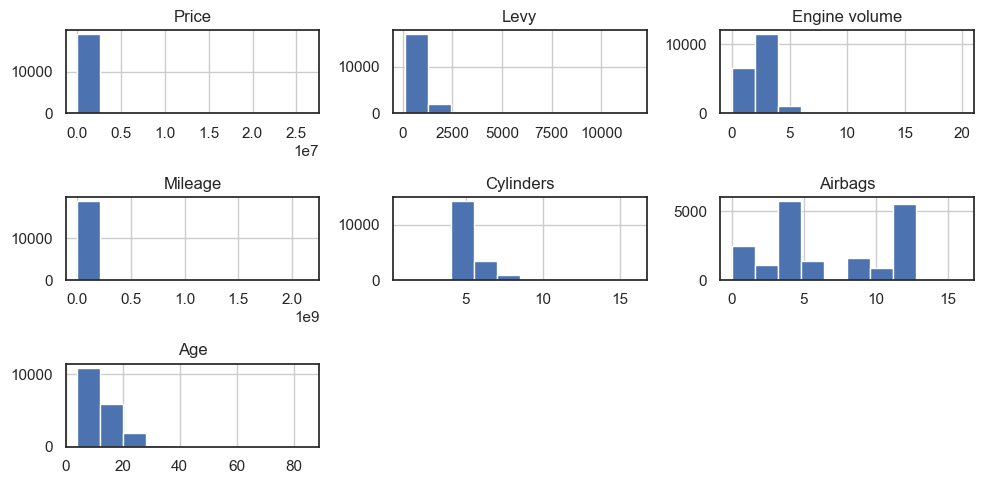

In [59]:
raw_data.hist(figsize=(10,5)) #bins: no. of intervals
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

**Scatter plot**

Scatter matrix plot supports data analytics to visualize and compare relationship between numerical variables. Each plot in the matrix presents the corelation between two specific variables. By applying this method, it is easier to detect trends, outliers, and correlation such as positive correlation, negative correlation and no correlation. 

In this step, we import the scatter matrix from ‘pandas.plotting’ function to create a grid of scatter plots of each pair of the numerical values with visualization to present the relationship. The figure size is 12 in width and 8 in length to make the sketch more clearly and readable. ‘plt.tight_layout ()’ function is also used to make sure the matrix is clear without overlapping. 

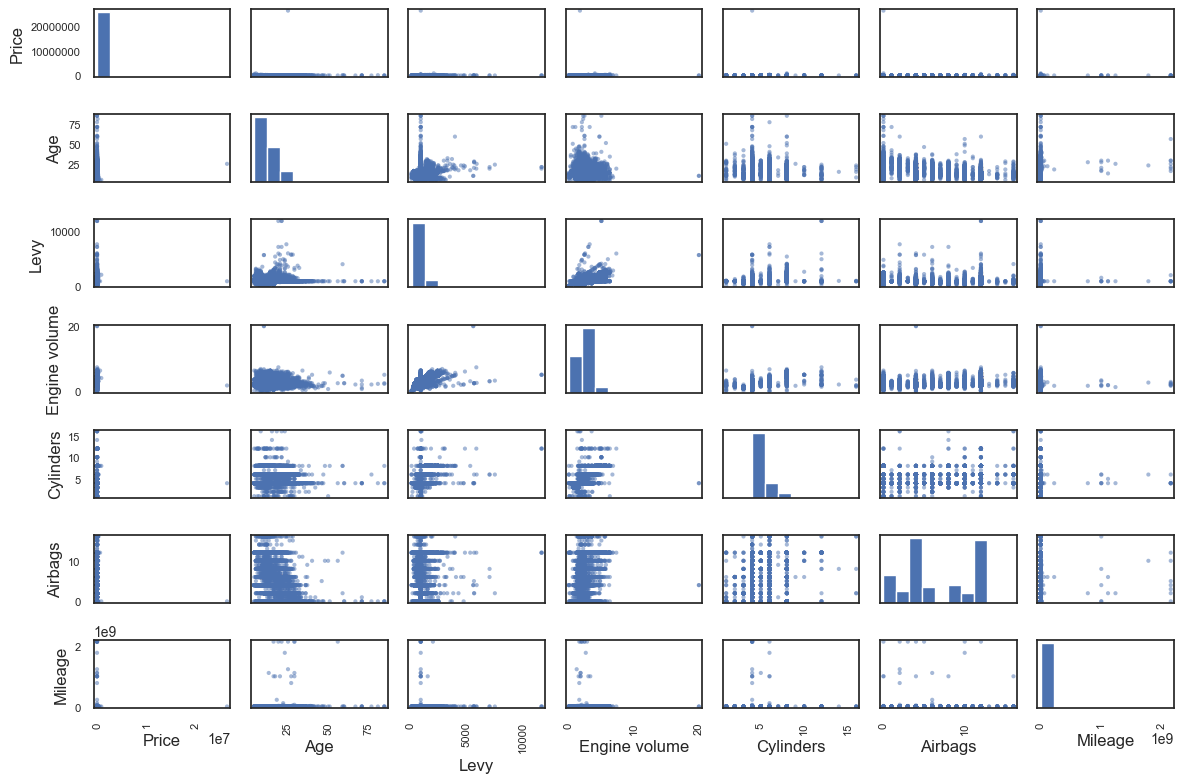

In [60]:
from pandas.plotting import scatter_matrix
def scatter(raw_data):
	attributes = ['Price', 'Age', 'Levy', 'Engine volume', 'Cylinders', 'Airbags', 'Mileage']
	scatter_matrix(raw_data[attributes], figsize=(12, 8))
	plt.tight_layout()
	plt.show()
scatter(raw_data)

In general, the scatter plot matrix illustrates the key features between numerical attributes. It also points out pairs of relationship that are unclear and imprecise and suggests the exist of complex correlation pairs that required adjustment 

- Engine volume vs Cylinder: The scatter plot presents strong linear relationship between these two features as higher engine volume required more cylinders. 

- Age vs Airbags: This is related to user safety aspects of vehicle operation, which explains that later production vehicles tend to have more airbags 

- Levy vs Engine Volume: The correlation of these two features indicates that bigger car with larger engine volume tend to pay more taxes or fees compared to smaller car. 

- Age vs Levy: older-aged production cars tend to have higher levies. It is due to the fact that new and mordern are more expensive. 

- Levy vs Cylinder: The correlation between levy and cylinder is not strong. However, it reflects that the owners of bigger cars with strong engines often pay more taxes. 

- Age vs Engine Volume: The correlation is slightly low but it shows the current trend of vehicle development in the world. This is related to the auto industry, more fuel efficiency in modern cars. 

- Air bags vs Cylinder: Bigger cars required more space for cylinders operation, which explains the more air bags required for safety issue. 

- Engine Volume vs Air bag: Similar to Cylinder attribute, bigger cars are produced with larger engine volume for operation, which made these features proportional to each other 

**Correlation between numerical attributes before refining dataset:** 

Analyse data value Correlation before refining 

Correlation refers to a statistical measure that presents the degree and direction of a linear relationship between two variables. For “numeric to numeric” data values, in the range [-1, 1], where 0 implies no correlation, 1 implies the peak correlation(as one variable increases, the other increases) and -1 means inverse correlation (as one variable increases, the other decreases) 

In [61]:
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix)

                  Price      Levy  Engine volume   Mileage  Cylinders  \
Price          1.000000  0.005509       0.008888 -0.001763   0.007435   
Levy           0.005509  1.000000       0.537900  0.008378   0.459803   
Engine volume  0.008888  0.537900       1.000000 -0.006292   0.777228   
Mileage       -0.001763  0.008378      -0.006292  1.000000  -0.001720   
Cylinders      0.007435  0.459803       0.777228 -0.001720   1.000000   
Airbags       -0.012709  0.067877       0.221991 -0.009174   0.174112   
Age           -0.012689  0.107800       0.032427  0.064058   0.099443   

                Airbags       Age  
Price         -0.012709 -0.012689  
Levy           0.067877  0.107800  
Engine volume  0.221991  0.032427  
Mileage       -0.009174  0.064058  
Cylinders      0.174112  0.099443  
Airbags        1.000000 -0.235160  
Age           -0.235160  1.000000  


**Correlation matrix and heat map:**

The project objective is to develop a car prediction model with highest accuracy so the team decided to move the ‘Price’ column to the end, make it easier to focus on as the final result. 

The ‘loc’ function is applied to rearrange the column order in the correlation matrix. Pair of correlation values with higher value will be display on top while the lowest pair will be place at the bottom. 

To make data analysis easier and more visual, we use ‘seaborn (sns.heatmap)’ to create a graphical presentaion called ‘Heat map’. The heat map includes the following aspects with explaination: 

Annot = True: Correlation numerical values are displayed on the map for visualize 

cmap='coolwarm': This tool is applied to identify the consistent of correlation with warm colors presents positive correlation and cool colors present negative correlation. The increase in correlation is proportional to the increase in color intensity. 

Rotation: The y-axis remains horizontal while the x-axis rotates 90 degrees to complete the matrix. 

                  Price      Levy  Engine volume   Mileage  Cylinders  \
Price          1.000000  0.005509       0.008888 -0.001763   0.007435   
Levy           0.005509  1.000000       0.537900  0.008378   0.459803   
Engine volume  0.008888  0.537900       1.000000 -0.006292   0.777228   
Mileage       -0.001763  0.008378      -0.006292  1.000000  -0.001720   
Cylinders      0.007435  0.459803       0.777228 -0.001720   1.000000   
Airbags       -0.012709  0.067877       0.221991 -0.009174   0.174112   
Age           -0.012689  0.107800       0.032427  0.064058   0.099443   

                Airbags       Age  
Price         -0.012709 -0.012689  
Levy           0.067877  0.107800  
Engine volume  0.221991  0.032427  
Mileage       -0.009174  0.064058  
Cylinders      0.174112  0.099443  
Airbags        1.000000 -0.235160  
Age           -0.235160  1.000000  

 Price            1.000000
Engine volume    0.008888
Cylinders        0.007435
Levy             0.005509
Mileage         -0.00

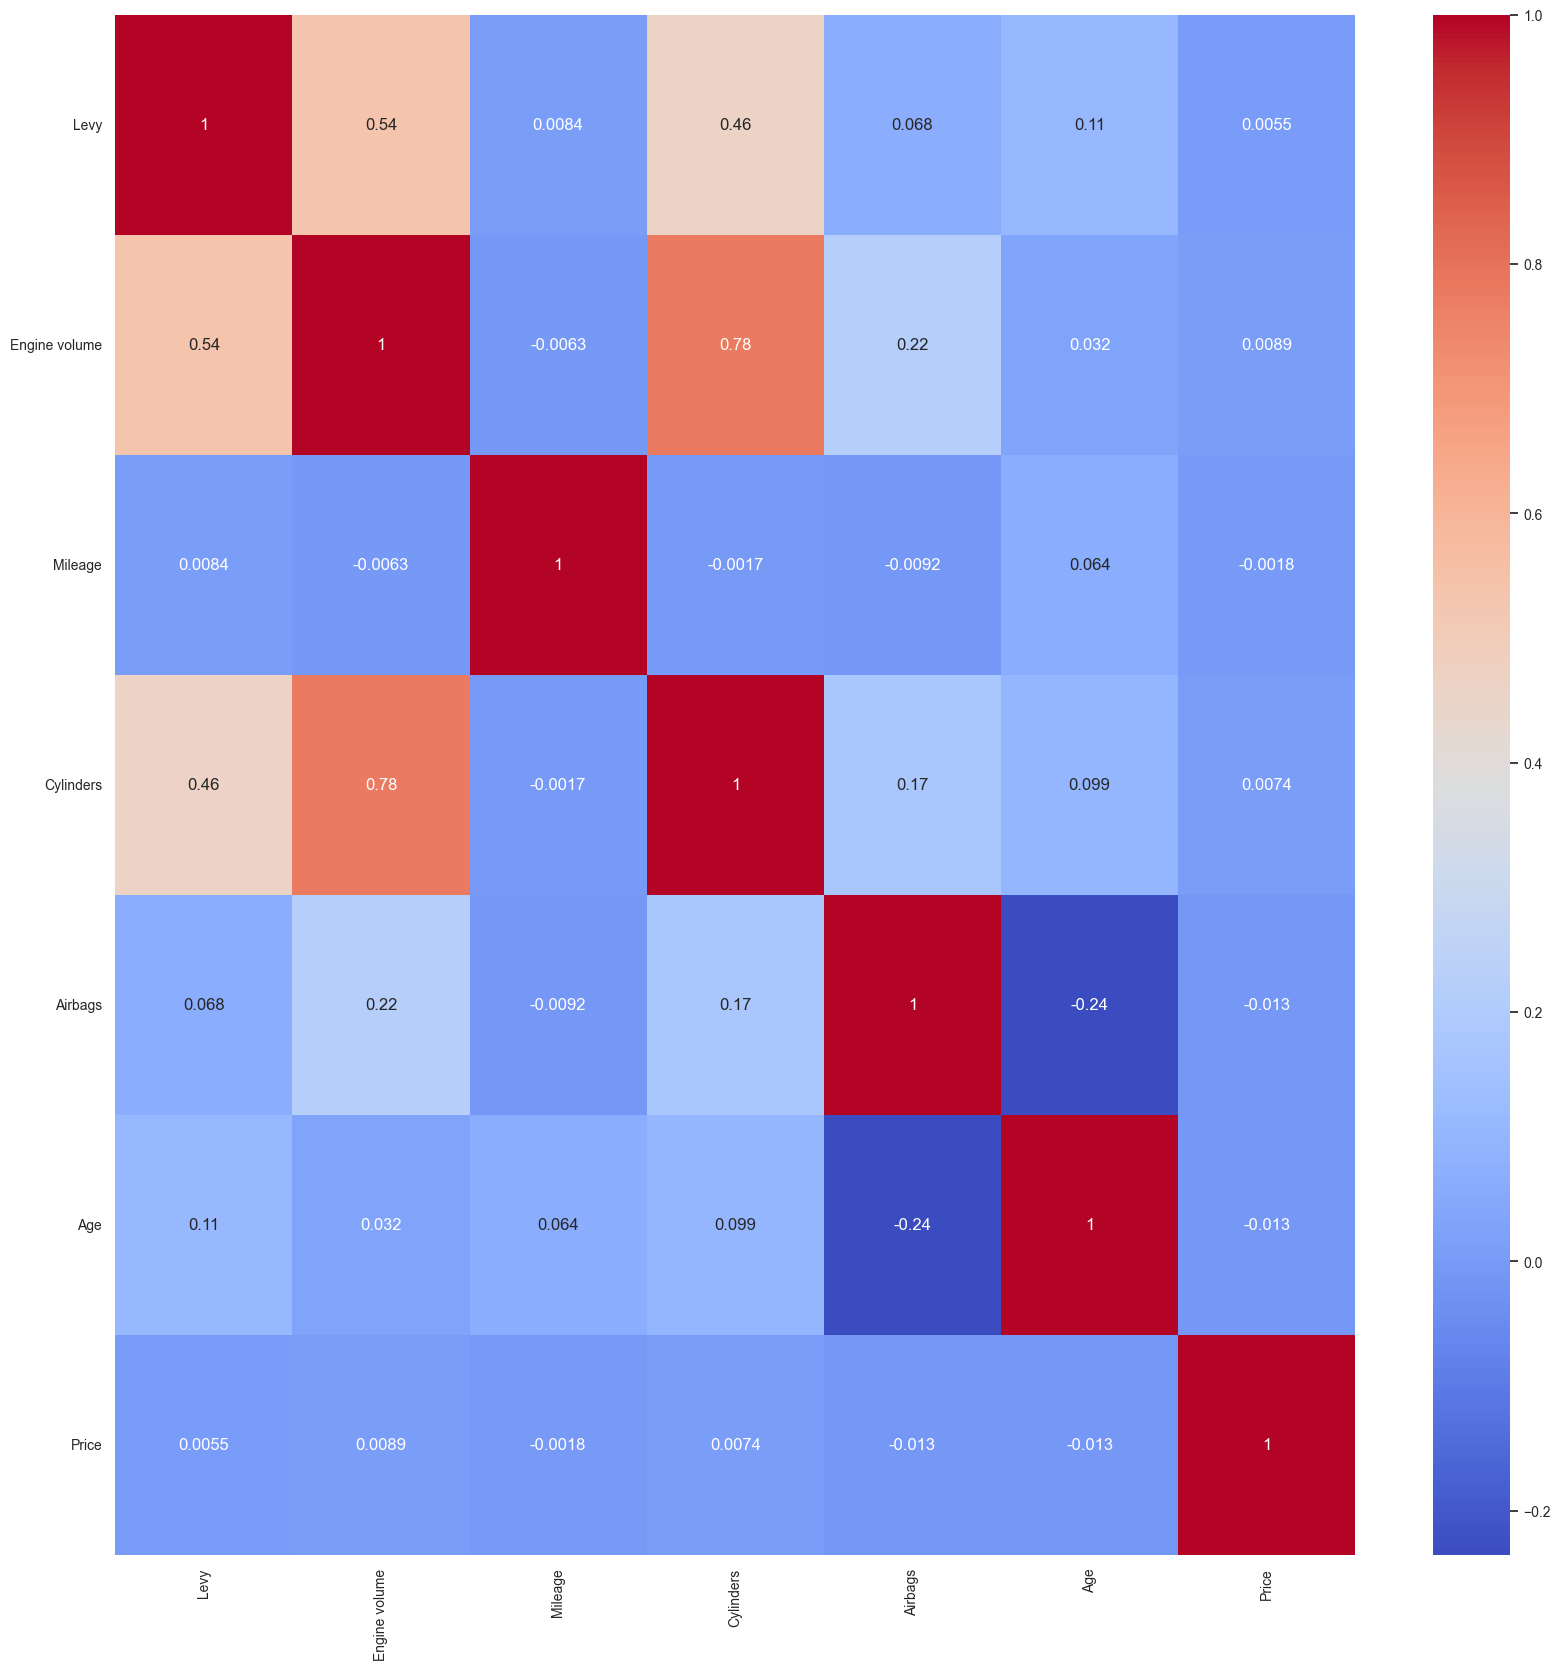

In [62]:
# 3.4 Correlation matrix
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["Price"].sort_values(ascending=False)) # print correlation b/w a feature and other features

columns = list(corr_matrix.columns)
columns.remove('Price')
columns.append('Price')
corr_matrix = corr_matrix.loc[columns, columns]

# Create a heatmap from the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=90, fontsize=10)
# Rotate y-axis labels
plt.yticks(rotation=0, fontsize=10)
plt.show()

**Create and analyse heat map:**

Heat map illustrates the correlation of the feature in pairs through x axis and y axis. The color gradient is helpful in identify strongness and weaknesss of the relationship. Besides that, dataa analyst can also identify patterns and clusters when dealing with numerical variables. 

  

**Top 5 most correlation:** 
- Engine volume vs Cylinders (0.7785): Highest correlation which explains that higher engine volume tends to have more cylinders. The correlation is presented in deep red color
- Levy vs Engine volume (0.3774): Cars with larger engine volume tends to have higher levy. The correlation is presented in light red color. It is not as strong as the first pair but still present a positive relationship
- Levy vs Age (-0.36): Production year contributes in the decision of levy prices. The correlation is presented in pink color, indicates new and mordern cars usually have higher price due to levy. However, the negative correlation is not reasonable and required adjustment.
- Airbags vs Age (-0.24): relationship between production year and airbags as ater production cars will often have more airbags. The correlation is shown in light blue, can considered as weak relationship. However, the negative correlation is not reasonable and required data process solutions.
- Cylinders vs Airbags (0.1769): low correlation as these two features do not affect each other in predicting car prices; presented in light blue color.

**Top 5 least correlation:**
- Price vs Levy (-0.0037): The correlation is presented in dark blue, very weak correlation. However, this is an error in the dataset and required adjustments because levy does always have a certain influence to car price prediction.
- Mileage vs Levy (-0.0210): The correlation is presented dark blue as these two attributes are irrelevant in the final price of the car.
- Mileage vs Airbags (-0.0092): The correlation suggests almost zero correlation between these features, presented in dark blue as well
- Mileage vs Engine volume (-0.0063): Extreme low value in correlation, the relationship between mileage and engine volume is purposeless in deciding the car price
- Price vs Airbags (-0.0128): This value need to have some adjustments because there is a relationship between these two features. The number of airbags are related to the car manufacturer and it is one of the key features that decide the car value. It should not be display at weak correlation in general.

These pair of variables displays almost or very weak correlation in car price prediction.

**Check normality of data before removing outliers**
The main purpose is to Focus on the normality of numeric variables in dataset and two key features: Skewness and Kurtosis. Skewness is the method of measuring the imbalance of distribution in values and Kurtosis is the method of demonstrates the skewness of distribution compared to a certain standard; usually heavy ‘tail’ or light ‘tail’. Besides that, to get a clearer and more accurate point of view, the team also calculate Mean, Median, Standard Deviation and Potential Normal.  

Overall, the airbags is the only features that is approximately normal distributed while other variables showing significant skewness and kurtosis, suggesting outliers, extreme values and asymmetrical distributions that required thoroughly prepare. 

In [63]:
# Check normality summary
def normality_sum(df):
    num_col = df.select_dtypes(include=[np.number]).columns

    result = []
    for col in num_col:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        result.append({
            'Variable' : col,
            'Skewness' : skewness,
            'Kurtosis' : kurtosis,
            'Mean' : df[col].mean(),
            'Median' : df[col].median(),
            'Std Dev' : df[col].std(),
            'Potential Normal' : abs(skewness) <= 1 and abs(kurtosis) <= 3
        })

    return pd.DataFrame(result)

normality_df = normality_sum(raw_data.drop(['Price'], axis =1))
print("Summary")
print(normality_df)

Summary
        Variable   Skewness     Kurtosis          Mean         Median  \
0           Levy   6.555244   124.414365  9.062992e+02     906.299205   
1  Engine volume   2.208051    19.555731  2.306251e+00       2.000000   
2        Mileage  38.578517  1572.672121  1.555373e+06  126400.000000   
3      Cylinders   2.107707     6.587165  4.580216e+00       4.000000   
4        Airbags   0.086344    -1.332103  6.568379e+00       6.000000   
5            Age   2.088595    11.450244  1.308576e+01      12.000000   

        Std Dev  Potential Normal  
0  3.871520e+02             False  
1  8.775910e-01             False  
2  4.880221e+07             False  
3  1.200223e+00             False  
4  4.322323e+00              True  
5  5.665749e+00             False  


# **EDA on categorical features**

To perform the distribution of categorical features based on Exploratory Data Analysis (EDA), we used ‘for loop’ function to concentrate on each specific features with categorical values from the dataset. 

There are 11 charts in total with the size is set to 8x6 and each of them represent the specific categorical features. The library (sns.countplot) is used to create a count plot with the purpose of demonstrating the frequency of each category in a categorical attribute. For example, in the column ‘Model’ (e.g., “RX350”, “Santa FE”) this will show the number of each value appear in the dataset. 

To optimize the distribution of each variables, we labeled the x-axis with the name of the attribute and y-axis is the frequency. The graphs also display with title (e.g., Distribution of Gear box type) 

Overall, the 11 histograms allow the team to detect if the data is imbalanced, extreme values such as one vehicle’s model occupy large number compared to the rest. 

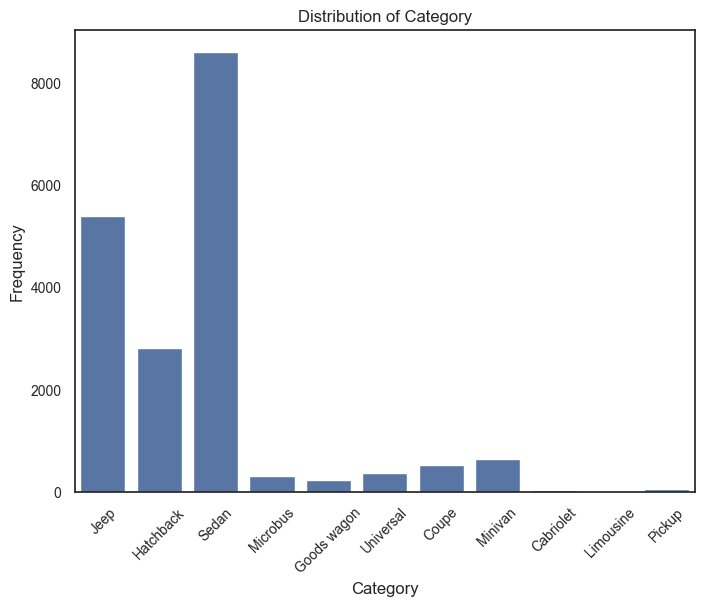

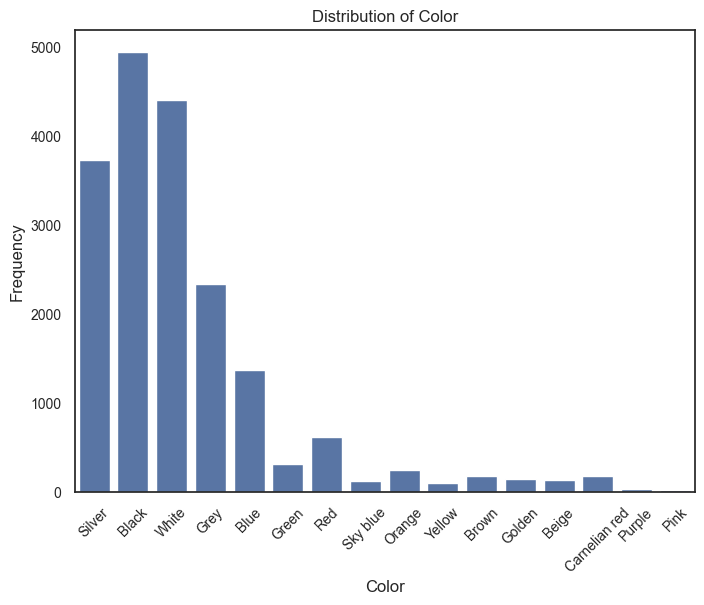

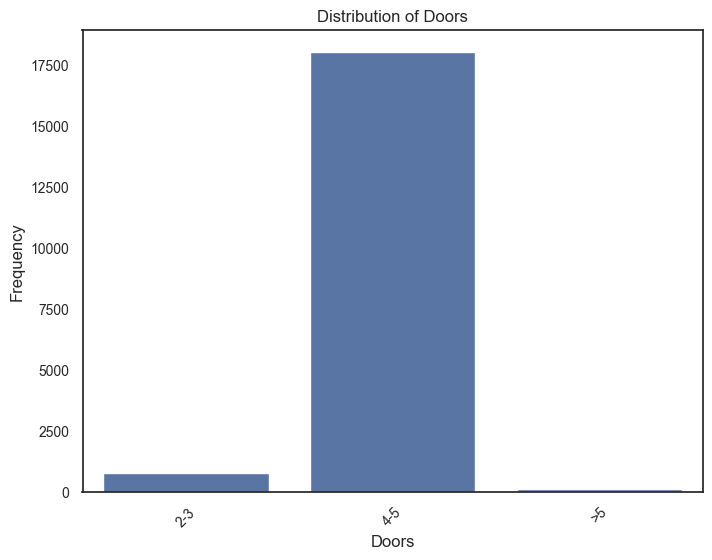

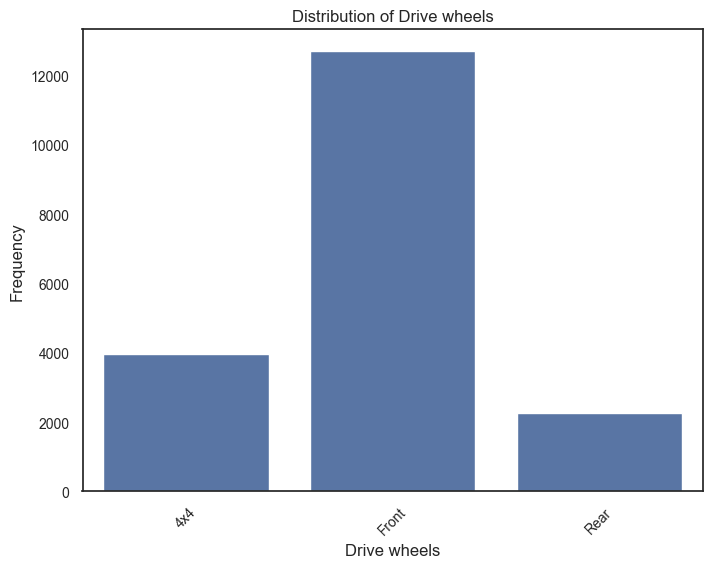

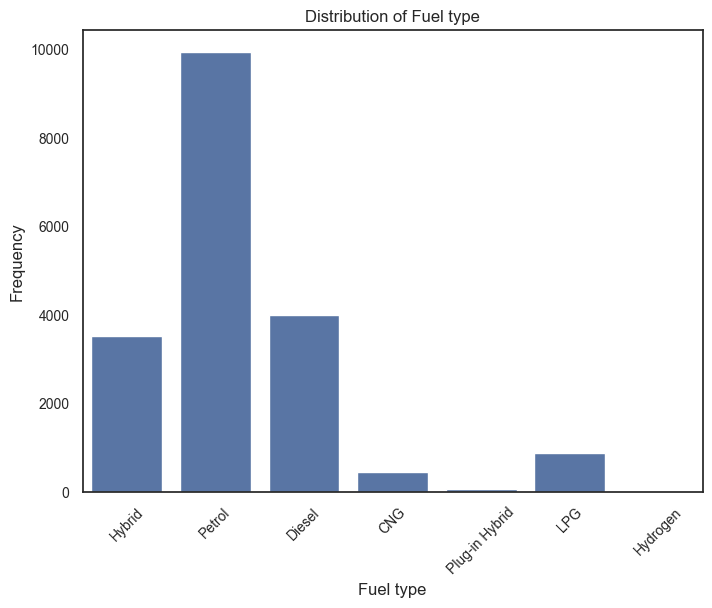

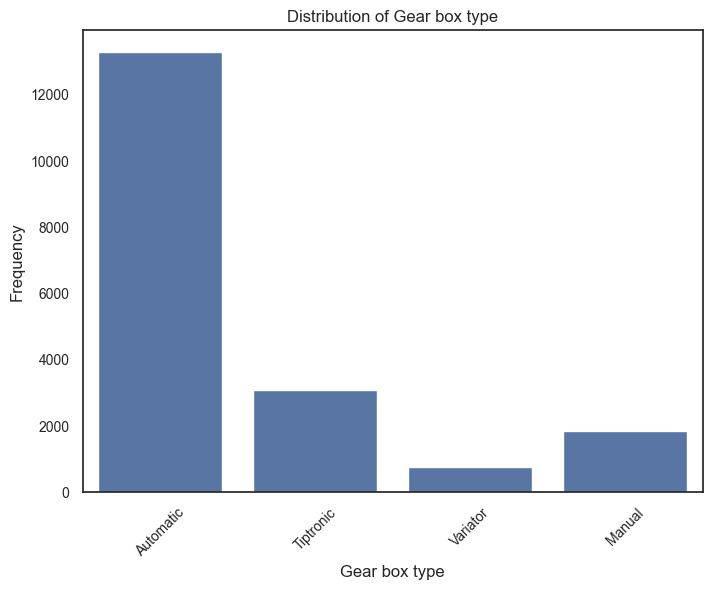

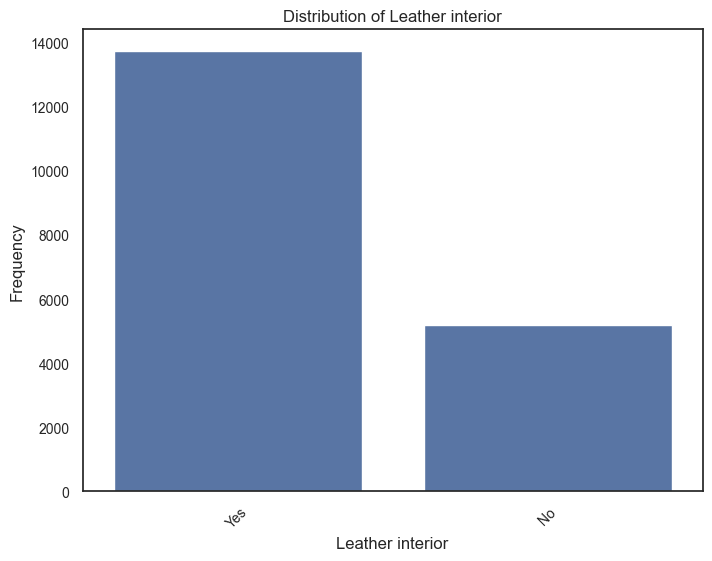

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4334 (\N{GEORGIAN LETTER XAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4309 (\N{GEORGIAN LETTER VIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4304 (\N{GEORGIAN LETTER AN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


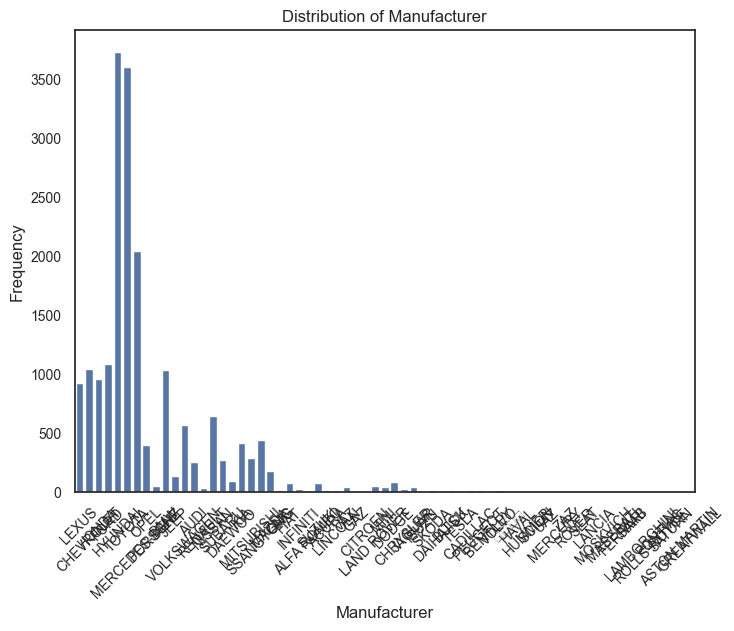

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4304 (\N{GEORGIAN LETTER AN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4315 (\N{GEORGIAN LETTER MAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4306 (\N{GEORGIAN LETTER GAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: U

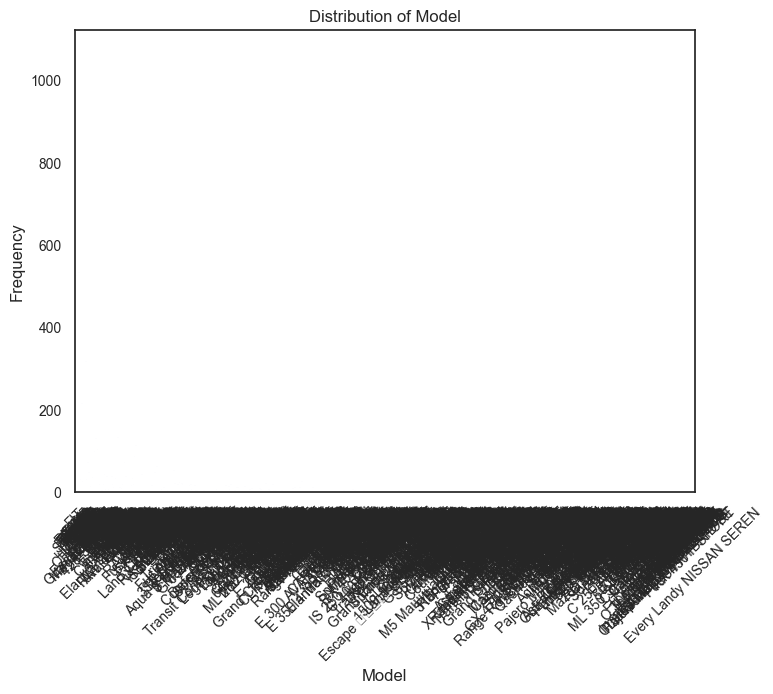

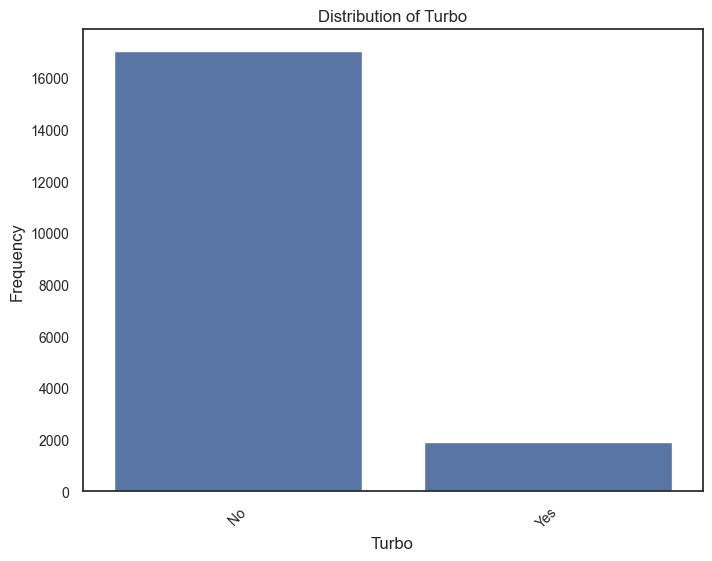

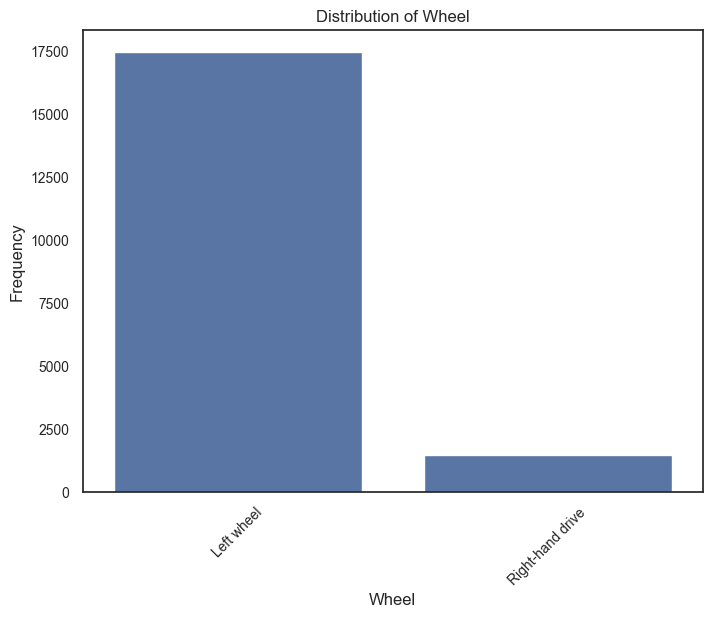

In [64]:
for feature in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=raw_data)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

**Analyse 11 graphs** 

- Distribution of Category Attribute: Sedan appears as the majority of the dataset, followed by Jeeps and Hatchbacks which make the distribution is highly imbalanced. Other categories such as Coupes, and Minivans are much less in quantity. 

- Distribution of Color:  Silver, Black and White are the three most common car colour. Overall, the graph illustrates skew left in the distribution towards neutral colours (Silver, Black and White) and vibrant colours (Red, Blue and Green) are much less frequent. 

- Distribution of Doors: The distribution can be seen as heavily concentrated, which means most of the car’s model are Sedan, Hatchbacks and Jeeps with the number of cars that have 4 to 5 doors majority. 

- Distribution of Drive wheels: ‘4X4’ and ‘Rear’ attributes occupy a small amount while Front drive wheels dominate the dataset. 

- Distribution of Fuel Type: Up to now, gasoline (Petrol) has always been the fuel that accounts for the largest quantity, follow by Diesel and Hybrid. Therefore, CNG and LPG only count for a small amount and Plug-in-Hybrid negligible surplus. 

- Distribution of Gear Box type: The distribution presents that most cars engine in dataset are automatic transmission while manual transmission and tiptronic are less frequent. This features is related to the model’s type as nowadays Sedan cars are mostly automatic gear box type. 

- Distribution of Leather interior: Most cars have leather interiors and more than double the number of cars that do not have. 

- Distribution of Manufacturer: The dataset contains 65 unique manufacturers from all over the world, but the most popular cars production are from Japan, Korea and Germany. The distribution is highly imbalance as the Hyundai represents the majority of the dataset, follow by Toyota and Mercedes-Benz. On the other hand, some manufacturers have very few entries such as Tesla, Pontiac, Saturn or Aston Martin (only 1 car in the dataset).  It is clearly that the graph is skew to the left side. 

- Distribution of Model: The distribution chart of cars model have many similarities in addition to strong correlation to the Manufacturers attributes. This explain why the top five highest variables are: 

	* Prius: 1,083 entries 

	* Sonata: 1,079 entries 

	* Camry: 938 entries 

	* Elantra: 922 entries 

	* E 350: 542 entries 

They are the models from Toyota, Hyundai and Mercedes Benz, significantly more numerous than other models. Luxury cars model from brands like Aston Martin are barely even visible on the chart. 

  

- Distribution of Turbo: The number of cars with turbo is five times higher than the one without it, this is related to the number of Sedan’s model type. Most of the Sedan model doesn’t have turbo because of its higher price in addition to users requirements. 

- Distribution of Wheel: The distribution indicates that most car users are left hand drive, which is popular in European Countries and The US. Right hand drive is common for Asian countries like Japan and Korea. The reason for this disparity distribution might be due to the dataset’s origin and target market 

# **Step 4. PREPARE THE DATA**

**Remove Outliers:**

The team applied the Interquartile Range (IQR) method to detect and remove outliers from the dataset. We set the range between the first quartile (Q1) and the third quartile (Q3) and outliers value is considered as the upper bound and lower bound based on the IQR calculation. With target outcome of less outliers and better distribution model, we calculated the value Q1 (below Q1 - 1.5 * IQR) and Q3 (above Q3 + 1.5 * IQR). Besides that, ‘np.percentile()’ fuction is also used to calculate the 25th percentile (Q1) and the 75th percentile (Q3). It is very important in calculating IQR and define outliers. 

This cell is to inspect the number of outliers that may affect the prediction on the Price label. The outliers if counted if its value is higher or lower than the threshold of IQR. 

In [65]:
def remove_outliers_iqr(data, factor=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - factor * iqr
    upper_bound = Q3 + factor * iqr
    return lower_bound, upper_bound

lower_bound, upper_bound = remove_outliers_iqr(raw_data['Price'], factor=1.5)
price_column = raw_data['Price']

outliers = (price_column < lower_bound) | (price_column > upper_bound)

# Count and print the number of outliers
num_outliers = np.sum(outliers)
print(f'Number of outliers: {num_outliers}')

# Remove outliers from the DataFrame
raw_data = raw_data[~outliers]


Number of outliers: 1055


Subplots: The team sets up a 1x2 grid of subplots with the size of 14x4 inches.  

Boxplots: The boxplot of price column is created with coloured light coral; we also adjust the space between subplots to prevent overlapping 

Histogram of price: The graph displays the distribution of Price attributes and divided the data into 30 intervals (Bins = 30), we also added the KDE curve to demonstrates the probability density of the price. 

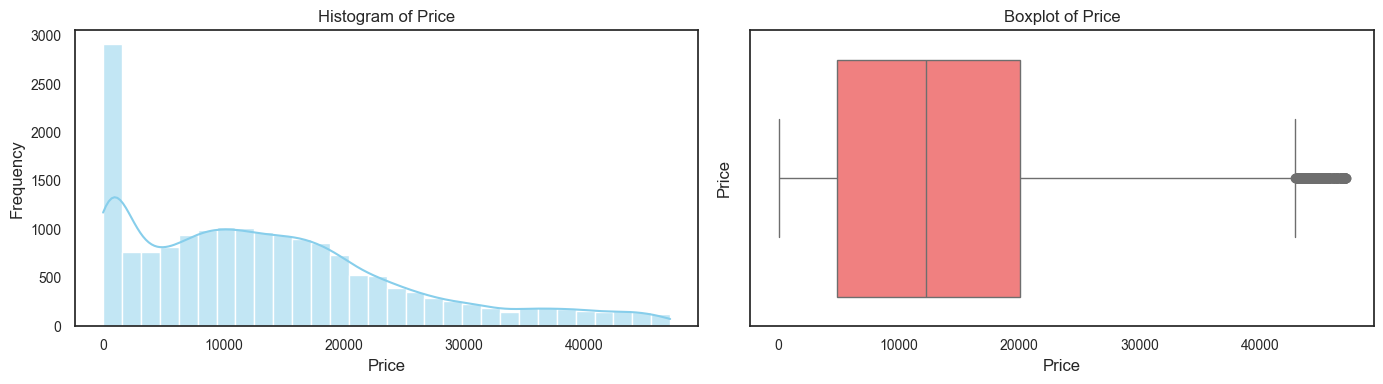

In [66]:
# Set up a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Histogram
sns.histplot(raw_data['Price'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=raw_data['Price'], color='lightcoral', ax=axes[1], boxprops=dict(facecolor='lightcoral'))
axes[1].set_title('Boxplot of Price')
axes[1].set_ylabel('Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**Key features and analysis:**

Histogram of Price: 

- The histogram shows a right-skewed distribution, indicates that most cars have lower prices and the higher the price of the car, the fewer the quantity. There significant number of cars are priced around 0 to 5000 and the frequency decreases as the price increases. Lastly, the KDE curve provides a smooth and clear graph of distribution of the skewness towards the lower prices. 

  

Boxplot of price: 

- The boxplot provides a summary of price distribution and the interquartile range (IQR), located in the middle 50% of the data. The median price is presents in the box, which is around 14,583. It is also displaying the outliers in the dataset of the price, which can be seen in the grey points to the far right, suggesting expensive cars. 

**Remove Outliers:**

The team applied the Interquartile Range (IQR) method to detect and remove outliers from the dataset. We set the range between the first quartile (Q1) and the third quartile (Q3) and outliers value is considered as the upper bound and lower bound based on the IQR calculation. With target outcome of less outliers and better distribution model, we calculated the value Q1 (below Q1 - 1.5 * IQR) and Q3 (above Q3 + 1.5 * IQR). Besides that, ‘np.percentile()’ fuction is also used to calculate the 25th percentile (Q1) and the 75th percentile (Q3). It is very important in calculating IQR and define outliers. 

  

(consider bỏ)Create a copy (raw_data) to breaking the original data. 

- Filter the ‘Price’ attribute with the minimum value of 500, remove the extreme values. 

- For ‘Age’, ‘Engine volume’, ‘Mileage’, ‘Airbags’, ‘Price’, ‘Levy’ attributes, use ‘loop’ function to filter and detect rows that include outliers using IQR method. 

- Delete the outlier values and then create a dataset with the processed data. 

- By removing outliers, the analysis or model building process will become easier and more accurate; eliminate the possibility extreme values can distort results. 

In [67]:
# List of columns to check for outliers
columns_to_check = ['Levy', 'Engine volume', 'Mileage','Cylinders']# Not including Airbags since distro seems normal

# Dictionary to store outlier counts
outlier_counts = {}

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find and count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Remove outliers from the DataFrame
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned, outlier_count

raw_data = raw_data[raw_data['Price'] >= 500]

# Iterate over columns, remove outliers, and store counts
for column in columns_to_check:
    raw_data, count = remove_outliers_iqr(raw_data, column)
    outlier_counts[column] = count

# Display outlier counts
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Outlier Counts:
Levy: 2302
Engine volume: 292
Mileage: 529
Cylinders: 2321


The table shows the summary of the dataset after applied IQR method to remove outliers. The dataset is now cleaner, easier to analyse without worring about the distortion caused by extreme values.  

Compare to the old dataset, there were unrealistic negative values appear in the Price, Levy, Mileage, and Airbags attributes and all of them have been remove. Besides that, the maximum values appear in Price, Levy, Mileage, and Airbags attribute have been decrease slightly, indicates that some outliers were removed. Means value remain the same, indicates that data’s central tendency was not affect by removing outliers at all. However, the IQR method results in the range (max and min), which are more realistic.  

For example: 

`‘Mileage’ attribute:`

- Old Table: 

* Mean: 127,390 km 

* Min: -93,861 km (negative mileage value,  unreasonable) 

* Max: 343,102 km 

 

- New Table: 

* Mean: 127,390 km (remains the same) 

* Min: 0 km (negative mileage removed) 

* Max: 343,047 km (slightly lower maximum) 

**Conclusion:** Indicating some outliers removed as the negative mileage is deleted and the maximum value is slightly reduced. 

**Raw data after removal:**

The table displays the structures and summary of the dataset after removing the outliers 

**Key features:** 

- Total entries: there are 10,792 entries (rows) in the dataset after the removal of outliers, some rows with extreme values were deleted during handling process. 

- Columns: 18 columns (features), including numerical columns and categorical columns. They are listed with name, the non-null count and data type 

- Non-nun count: There are 10,792 non-nun entries, suggest that there will be no missing values occur in any of the column 

- Data types: Object, Float64, Int64, Category 

The data summary is crucial for understanding the current state of the dataset before processing any further state such as data cleaning or modelling. 

In [68]:
raw_data.info() # after removal

<class 'pandas.core.frame.DataFrame'>
Index: 10792 entries, 2 to 19234
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             10792 non-null  int64   
 1   Levy              10792 non-null  float64 
 2   Manufacturer      10792 non-null  object  
 3   Model             10792 non-null  object  
 4   Category          10792 non-null  object  
 5   Leather interior  10792 non-null  object  
 6   Fuel type         10792 non-null  object  
 7   Engine volume     10792 non-null  float64 
 8   Mileage           10792 non-null  float64 
 9   Cylinders         10792 non-null  float64 
 10  Gear box type     10792 non-null  object  
 11  Drive wheels      10792 non-null  object  
 12  Doors             10792 non-null  category
 13  Wheel             10792 non-null  object  
 14  Color             10792 non-null  object  
 15  Airbags           10792 non-null  int64   
 16  Turbo             10792 non

**Analyze categorical columns and Feature Engineering**


In [69]:
raw_data['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          2859
TOYOTA           2058
CHEVROLET         779
FORD              678
HONDA             628
MERCEDES-BENZ     462
NISSAN            423
VOLKSWAGEN        404
SSANGYONG         396
OPEL              319
KIA               314
SUBARU            201
MITSUBISHI        198
BMW               176
LEXUS             129
MAZDA             111
AUDI               95
DAEWOO             90
FIAT               69
JEEP               62
SUZUKI             49
VAZ                39
MINI               38
DODGE              37
RENAULT            33
SKODA              16
PEUGEOT            14
JAGUAR             10
BUICK              10
CHRYSLER            9
UAZ                 9
GMC                 8
DAIHATSU            8
SCION               7
CITROEN             6
LAND ROVER          5
GAZ                 5
ACURA               4
VOLVO               4
CADILLAC            4
ROVER               3
LINCOLN             3
INFINITI            3
ALFA ROMEO          3
MERCURY            

**Check normality after removing outliers:**

In [70]:
# Check normality summary
def normality_sum(df):
    num_col = df.select_dtypes(include=[np.number]).columns

    result = []
    for col in num_col:
        skewness = df[col].skew()
        kurtosis = df[col].kurtosis()
        result.append({
            'Variable' : col,
            'Skewness' : skewness,
            'Kurtosis' : kurtosis,
            'Mean' : df[col].mean(),
            'Median' : df[col].median(),
            'Std Dev' : df[col].std(),
            'Potential Normal' : abs(skewness) <= 1 and abs(kurtosis) <= 3
        })

    return pd.DataFrame(result)

normality_df = normality_sum(raw_data.drop(['Price'], axis =1))
print("Summary")
print(normality_df)

Summary
        Variable  Skewness  Kurtosis           Mean    Median       Std Dev  \
0           Levy -0.241875 -0.553952     793.388950     831.0    159.048289   
1  Engine volume  0.342326  0.244149       1.923184       2.0      0.382479   
2        Mileage  0.502619 -0.052766  124760.265845  119989.5  74654.901617   
3      Cylinders  0.000000  0.000000       4.000000       4.0      0.000000   
4        Airbags  0.396975 -0.951874       6.005374       4.0      3.885867   
5            Age  1.833493  6.301523      13.051612      12.0      5.517415   

   Potential Normal  
0              True  
1              True  
2              True  
3              True  
4              True  
5             False  


**Import histogram of price column:** 

  

The team import the Matplotlib library for plotting, which is used for interactive visualization and animated. The figure is set to 8x4 inches size to have clear dimensions. The figure is displayed with ‘Title’, X-label (presenting the car prices) and Y-label (represent the frequency) 

The histogram displays the distribution of car prices in the dataset. Overall, it can be seen as left-skewed distribution, suggesting the number of cars with lower prices is larger than the number of cars with higher prices. 

The highest frequency is in the price range at 5000, suggesting a large number of cars in the dataset is inexpensive 

Towards the right, there are fewer cars which ranging at around 30000 to 40000, suggesting that expensive cars are less popular. 

The histogram is divided into 30 bins, demonstrates the cars’ proportion that fall into each price range. The bin widths display the interval of 1500, it is depended on the data distribution. 

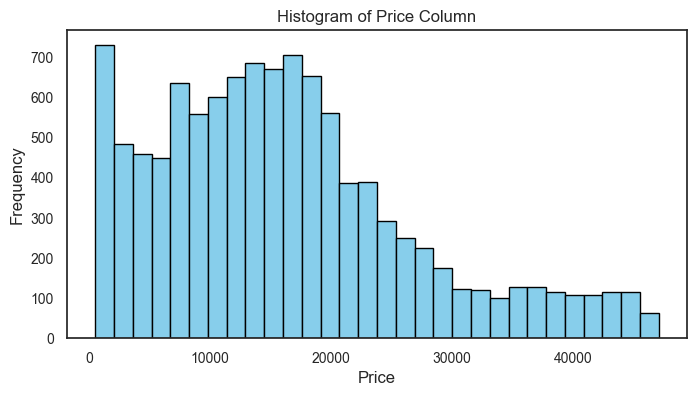

In [71]:
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(8, 4))
plt.hist(raw_data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Heatmap:**

Correlation heatmap is provided to represent the relationship between all numerical variables. The selected data are columns with integer (int64) and floating-point (float64). After that, remove the column ‘Cylinders’ as it does not contribute in the correlation analysis. The team used the function ‘corr()’ to compute the correlation matrix. It calculates the relationship between pairs of numerical attributes, suggesting the range from -1 (perfect negative correlation) to 0 (no correlation) and 1 (perfect positive correlation). For the design, the ‘plt.figure(figsize=(6, 4))’ function sets the heatmap size to 6x4 inches with a white background. ‘Viridis’ is the colour gradient that goes from dark to bright, indicates the increase in correlation of the attributes. The 'Cylinders' is considered ineffective because almost its data is 4.

Correlation heatmap describe: 

**Top 3 most positive correlation:**

* Levy and Engine Volume (0.25): The correlation suggests that larger car engines tend to have higher levies. This is common in today’s world as big cars with large engine volumes indicate higher performance. 

* Mileage and Age (0.23): As expected, cars with earlier production year generally have higher mileage, indicates a moderate positive correlation. 

* Price and Engine Volume (0.16): The relationship points out that larger engines volume tend to be priced higher, suggesting that it could be a premium car model with high power and performance. 

  

**Top 3 most negative correlations:** 

- Age and Levy (-0.47): This is a moderate negative correlation, suggesting that older car owners tend to pay less fees compared to the others as their overall value and performance decrease over time. 

- Age and Price (-0.41): In general, older cars usually have lower prices. This is expected because cars prices typically depreciate in value over time, suggesting a negative correlation. 

- Airbags and Age (-0.31): There is a small negative correlation between these two features. New cars tend to have more airbags, which is related to safety regulations and technology in recent years. 

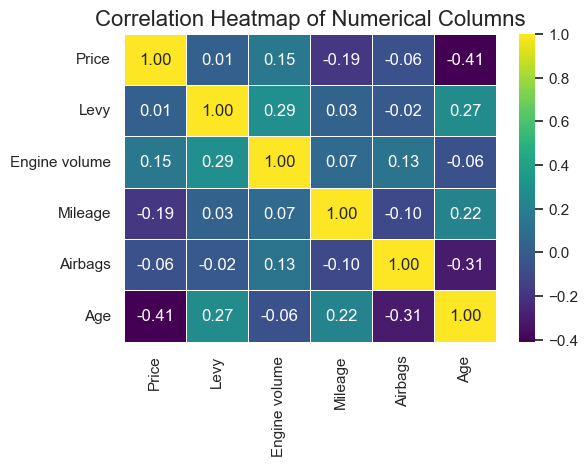

In [72]:
# Select only numerical columns with int64 and float64 data types excluding 'Cylinders'
numerical_columns = raw_data.select_dtypes(include=['int64', 'float64']).drop(columns=['Cylinders'], errors='ignore')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up Seaborn style
sns.set(style="white")

# Create a heatmap using Seaborn with a different colormap ('viridis')
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)

# Show the plot
plt.show()


## **Outlier**

**Strategy:**
Use LOO for 3 features, and the rest use OneHotEncoder

Explain Why

Explain what we have observed


Leave-One-Out Encoding (LOO Encoding) is a feature engineering technique used to treat categorical variables by encoding them based on the target variable's mean, excluding the current instance. The process is as follows:

- For each instance in a given category, calculate the mean of the target variable using all other instances within the same category, excluding the current instance itself.
- Replace the categorical value of the current instance with this mean.

This technique aims to provide a more robust encoding by avoiding data leakage, as it calculates the mean by excluding the target value of the instance being encoded.

Advantages of Leave-One-Out Encoding:

- Reduced Data Leakage:

	* LOO Encoding is designed to mitigate data leakage issues that can arise in target encoding, especially when there is a risk of overfitting to the target variable.

- Preservation of Information:

	* By excluding the target value of the instance being encoded, LOO Encoding attempts to provide an unbiased estimate of the category's impact on the target variable.

- Effective for Low Cardinality:

	* Particularly useful for categorical variables with low cardinality, where the number of instances in a category is limited.

- Adaptability:

	* LOO Encoding can be adapted to different models and is applicable in various supervised learning scenarios.

- Avoidance of Overfitting:

	* When used cautiously, LOO Encoding can help avoid overfitting to the target variable by providing a more general encoding strategy.

**Use LOO to treat ['Manufacturer', 'Model', 'Category'] categorical column**

In [73]:
from category_encoders import LeaveOneOutEncoder

# Select the columns to be encoded
columns_to_encode = ['Manufacturer', 'Model', 'Category']

# Initialize the LeaveOneOutEncoder
encoder = LeaveOneOutEncoder(cols=columns_to_encode)

# Fit and transform the entire DataFrame
raw_data_encoded = encoder.fit_transform(raw_data[columns_to_encode], raw_data['Price'])

# Concatenate the encoded columns with the original DataFrame
raw_data = pd.concat([raw_data, raw_data_encoded.add_suffix('_LOO')], axis=1)

In [74]:
raw_data.drop(columns=['Manufacturer', 'Model', 'Category'], inplace=True)

# Identify columns with datatype 'object' or 'category'
columns_to_encode = raw_data.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding with drop_first=True
raw_data_encoded = pd.get_dummies(raw_data, columns=columns_to_encode, drop_first=True)

raw_data_encoded

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_Yes
2,8467,906.299205,1.3,200000.0,4.0,2,18,13127.213716,13694.879004,12811.045502,...,False,False,False,False,False,False,False,False,False,False
3,3607,862.000000,2.5,168966.0,4.0,0,13,14542.676514,12630.410959,22553.778054,...,False,False,False,False,False,False,False,True,False,False
4,11726,446.000000,1.3,91901.0,4.0,4,10,13122.015949,13683.281139,12809.360393,...,False,False,False,False,False,True,False,False,False,False
5,39493,891.000000,2.0,160931.0,4.0,4,8,20625.255073,31222.115727,22538.918427,...,False,False,False,False,False,False,False,True,False,False
6,1803,761.000000,1.8,258909.0,4.0,12,14,15194.137579,13908.169188,12814.491210,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,906.299205,2.4,35800.0,4.0,12,10,16107.824281,16243.171887,14175.254347,...,False,False,False,False,False,False,False,False,False,False
19225,8781,1107.000000,1.7,236000.0,4.0,4,17,6982.154088,8076.812500,10417.333333,...,False,False,False,False,False,False,False,False,False,True
19232,8467,906.299205,2.0,300000.0,4.0,5,25,15867.678959,7682.166667,15173.032129,...,False,False,False,False,False,True,False,False,False,True
19233,15681,831.000000,2.4,161600.0,4.0,8,13,20633.586774,13766.833333,14175.928111,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Get the column names from the original DataFrame (X_train)
feature_names = X_train.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Plot the feature importances for the top 20 features
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [75]:
# Loop through columns
for column in raw_data_encoded.columns:
    # Check if the column contains boolean values (True/False)
    if raw_data_encoded[column].dtype == bool:
        # Replace True with 1 and False with 0
        raw_data_encoded[column] = raw_data_encoded[column].astype(int)

raw_data_encoded

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Manufacturer_LOO,Model_LOO,Category_LOO,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_Yes
2,8467,906.299205,1.3,200000.0,4.0,2,18,13127.213716,13694.879004,12811.045502,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.000000,2.5,168966.0,4.0,0,13,14542.676514,12630.410959,22553.778054,...,0,0,0,0,0,0,0,1,0,0
4,11726,446.000000,1.3,91901.0,4.0,4,10,13122.015949,13683.281139,12809.360393,...,0,0,0,0,0,1,0,0,0,0
5,39493,891.000000,2.0,160931.0,4.0,4,8,20625.255073,31222.115727,22538.918427,...,0,0,0,0,0,0,0,1,0,0
6,1803,761.000000,1.8,258909.0,4.0,12,14,15194.137579,13908.169188,12814.491210,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,906.299205,2.4,35800.0,4.0,12,10,16107.824281,16243.171887,14175.254347,...,0,0,0,0,0,0,0,0,0,0
19225,8781,1107.000000,1.7,236000.0,4.0,4,17,6982.154088,8076.812500,10417.333333,...,0,0,0,0,0,0,0,0,0,1
19232,8467,906.299205,2.0,300000.0,4.0,5,25,15867.678959,7682.166667,15173.032129,...,0,0,0,0,0,1,0,0,0,1
19233,15681,831.000000,2.4,161600.0,4.0,8,13,20633.586774,13766.833333,14175.928111,...,0,0,0,0,1,0,0,0,0,0


# Data Preparation

## Helper Functions

In [76]:
from sklearn.metrics import mean_squared_error

def r2score_and_rmse(model, train_data, labels):
    r2score = model.score(train_data, labels)
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse

def store_model(model, model_name=""):
    if model_name == "":
        model_name = type(model).__name__
    joblib.dump(model, 'models/' + model_name + '_model.pkl')

def load_model(model_name):
    model = joblib.load('models/' + model_name + '_model.pkl')

    return model

In [77]:
from sklearn.model_selection import train_test_split

# Separate the target variable (Price) and independent variables
X = raw_data_encoded.drop(columns=['Price','Cylinders'])
y = raw_data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(7554, 38)
(7554,)
(3238, 38)
(3238,)


# Model Training

## Linear Regression

In [78]:
new_training = 1  

if new_training: 
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="LinearRegression")
else:
    model = load_model("LinearRegression")

# Analyze performance
print('_____________LINEAR REGRESSION MODEL PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________LINEAR REGRESSION MODEL PERFORMANCE_________

 R2 Score (train data): 0.5229983095397257

 RMSE (train data): 7383.867303648206

 R2 Score (test data): 0.5214776753645329

 RMSE (test data): 7489.102232375463

Predictions:  [14370.5 21019.7 18812.1 25514.1 15463.7  9871.3 31480.9 17253.4 30486.1]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


## Ridge Regression

In [79]:
new_training = 1  

if new_training: 
    model = Ridge(alpha=0.1)
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="Ridge")
else:
    model = load_model("Ridge")

# Analyze performance
print('_____________RIDGE MODEL PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________RIDGE MODEL PERFORMANCE_________

 R2 Score (train data): 0.5229983092780089

 RMSE (train data): 7383.867305673862

 R2 Score (test data): 0.5214775678219049

 RMSE (test data): 7489.103073922083

Predictions:  [14370.6 21019.5 18812.  25514.  15463.6  9871.4 31480.8 17253.5 30486. ]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


## Decision Tree

In [80]:
new_training = 1  

if new_training: 
    model = DecisionTreeRegressor()
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="DecisionTreeRegressor")
else:
    model = load_model("DecisionTreeRegressor")

# Analyze performance
print('_____________DECISION TREE REGRESSOR PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________DECISION TREE REGRESSOR PERFORMANCE_________

 R2 Score (train data): 1.0

 RMSE (train data): 0.0

 R2 Score (test data): 0.9654162075961864

 RMSE (test data): 2013.3300004863968

Predictions:  [20209. 26814. 15994. 29087. 17876.  5959. 38229.   706. 37580.]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


## Random Forest

In [81]:
new_training = 1  

if new_training: 
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Calculate R2 score and RMSE
    r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
    r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)
    store_model(model, model_name="RandomForestRegressor")
else:
    model = load_model("RandomForestRegressor")

# Analyze performance
print('_____________RANDOM FOREST REGRESSOR PERFORMANCE_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

# Display some predictions and corresponding labels
print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_____________RANDOM FOREST REGRESSOR PERFORMANCE_________

 R2 Score (train data): 0.9971009762116348

 RMSE (train data): 575.6384747414021

 R2 Score (test data): 0.9838585102628137

 RMSE (test data): 1375.467915362107

Predictions:  [20213.  26799.2 15971.7 29159.7 17876.   5958.4 38211.8   706.  37582. ]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


## XGBoost

In [82]:
new_training = 1

if new_training:
  model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
  model.fit(X_train_scaled, y_train)
  store_model(model, model_name="XGBoost")
else:
  model = load_model("XGBoost")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)

print('_______SCORE FOR XGBOOST_________')
print('\n R2 Score (train data):', r2score)
print('\n RMSE (train data):', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

_______SCORE FOR XGBOOST_________

 R2 Score (train data): 0.9977205991744995

 RMSE (train data): 510.43083814780954

 R2 Score (test data): 0.9665787220001221

 RMSE (test data): 1979.2022429963513

Predictions:  [20308.6 26613.6 16072.9 29322.5 17806.   5919.2 38203.3   692.1 37633.5]
Labels:       [20209, 26814, 15994, 29087, 17876, 5959, 38229, 706, 37580]


## Neural Network

In [83]:
new_training = 1

if new_training:
    # Define the neural network architecture
    model = MLPRegressor(
        hidden_layer_sizes=(200, 100, 50, 25),
        activation='relu',
        solver='adam',
        alpha=0.002,  # L2 regularization
        batch_size=32,
        max_iter=100,
        early_stopping=True,
        n_iter_no_change=7,
        random_state=42,
        verbose=True
    )
    model.fit(X_train_scaled, y_train)
    store_model(model, model_name="NeuralNetwork")
else:
    model = load_model("NeuralNetwork")

r2score, rmse = r2score_and_rmse(model, X_train_scaled, y_train)
r2score_test, rmse_test = r2score_and_rmse(model, X_test_scaled, y_test)

print('_______SCORE FOR NEURAL NETWORK_________')
print('\nR2 score: ', r2score) 
print('RMSE score: ', rmse)
print('\n R2 Score (test data):', r2score_test)
print('\n RMSE (test data):', rmse_test)

print("\nPredictions: ", model.predict(X_train_scaled[0:9]).round(decimals=1))
print("Labels:      ", list(y_train[0:9]))

Iteration 1, loss = 116572044.95853586
Validation score: 0.474694
Iteration 2, loss = 26885196.61710904
Validation score: 0.546384
Iteration 3, loss = 24632264.79264225
Validation score: 0.577039
Iteration 4, loss = 23465335.61070969
Validation score: 0.586818
Iteration 5, loss = 22576866.23627398
Validation score: 0.608463
Iteration 6, loss = 21862669.17749421
Validation score: 0.617085
Iteration 7, loss = 21352026.93194007
Validation score: 0.627896
Iteration 8, loss = 20800032.14665561
Validation score: 0.635482
Iteration 9, loss = 20330807.25769571
Validation score: 0.646148
Iteration 10, loss = 19872228.85296577
Validation score: 0.649252
Iteration 11, loss = 19488005.68348044
Validation score: 0.652111
Iteration 12, loss = 19054637.02201027
Validation score: 0.654208
Iteration 13, loss = 18784574.68133923
Validation score: 0.665620
Iteration 14, loss = 18466701.88567036
Validation score: 0.665440
Iteration 15, loss = 18211584.19962117
Validation score: 0.677215
Iteration 16, loss

In [84]:
from sklearn.metrics import make_scorer

# Custom scorer for RMSE
rmse_scorer = make_scorer(root_mean_squared_error)

print('\n____________ K-fold cross validation ____________')

run_new_evaluation = 1

if run_new_evaluation:
    cv = KFold(n_splits=10, shuffle=True, random_state=37)

    # DECISION TREE
    model_name = "DecisionTreeRegressor"
    model = DecisionTreeRegressor(random_state=42)
    
    # Cross-validation scores for RMSE and R²
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'DecisionTreeRegressor RMSE: {np.mean(rmse_scores):.2f}')
    print(f'DecisionTreeRegressor R²: {np.mean(r2_scores):.2f}\n')

    # RANDOM FOREST
    model_name = "RandomForest"
    model = RandomForestRegressor(random_state=42)
    
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'RandomForest RMSE: {np.mean(rmse_scores):.2f}')
    print(f'RandomForest R²: {np.mean(r2_scores):.2f}\n')

    # RIDGE
    model_name = "Ridge"
    model = Ridge(alpha=0.1)
    
    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'Ridge RMSE: {np.mean(rmse_scores):.2f}')
    print(f'Ridge R²: {np.mean(r2_scores):.2f}\n')

    # LINEAR
    model_name = "Linear"
    model = LinearRegression()

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'Linear RMSE: {np.mean(rmse_scores):.2f}')
    print(f'Linear R²: {np.mean(r2_scores):.2f}\n')

    # XGBOOST
    model_name = "XGBoost"
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'XGBoost RMSE: {np.mean(rmse_scores):.2f}')
    print(f'XGBoost R²: {np.mean(r2_scores):.2f}\n')

    # NN
    model_name = "NeuralNetwork"
    model = MLPRegressor(
        hidden_layer_sizes=(200, 100, 50),
        activation='relu',
        solver='adam',
        alpha=0.001,  # L2 regularization
        batch_size=32,
        max_iter=30,
        early_stopping=True,
        n_iter_no_change=7,
        random_state=37,
        verbose=True
    )

    rmse_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    joblib.dump(r2_scores, 'saved_objects/' + model_name + '_r2.pkl')

    print(f'NN RMSE: {np.mean(rmse_scores):.2f}')
    print(f'NN R²: {np.mean(r2_scores):.2f}\n')

else:
    # Load saved RMSE and R² scores for each model
    models = ["DecisionTreeRegressor", "RandomForest", "Ridge", "Linear", "XGBoost", "NeuralNetwork"]

    for model_name in models:
        rmse_scores = joblib.load('saved_objects/' + model_name + '_rmse.pkl')
        r2_scores = joblib.load('saved_objects/' + model_name + '_r2.pkl')
        print(f"\n{model_name} RMSE: {np.mean(rmse_scores):.2f}")
        print(f"{model_name} R²: {np.mean(r2_scores):.2f}\n")



____________ K-fold cross validation ____________
DecisionTreeRegressor RMSE: 2190.34
DecisionTreeRegressor R²: 0.95

RandomForest RMSE: 1531.59
RandomForest R²: 0.98

Ridge RMSE: 7420.41
Ridge R²: 0.52

Linear RMSE: 7420.42
Linear R²: 0.52

XGBoost RMSE: 1817.78
XGBoost R²: 0.97

Iteration 1, loss = 140520422.93308267
Validation score: 0.343727
Iteration 2, loss = 29353491.76457131
Validation score: 0.526439
Iteration 3, loss = 25663081.76878320
Validation score: 0.557546
Iteration 4, loss = 24301273.61409612
Validation score: 0.574576
Iteration 5, loss = 23345260.57034447
Validation score: 0.584178
Iteration 6, loss = 22691910.37091187
Validation score: 0.588398
Iteration 7, loss = 22169580.89205812
Validation score: 0.600030
Iteration 8, loss = 21674694.21426845
Validation score: 0.601999
Iteration 9, loss = 21253055.75144306
Validation score: 0.601549
Iteration 10, loss = 20950233.59482926
Validation score: 0.616156
Iteration 11, loss = 20543722.23558618
Validation score: 0.621884

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 141621101.43212977
Validation score: 0.384457
Iteration 2, loss = 29554264.62068325
Validation score: 0.553826
Iteration 3, loss = 25853987.46189659
Validation score: 0.584286
Iteration 4, loss = 24454217.77175951
Validation score: 0.603259
Iteration 5, loss = 23524745.50180061
Validation score: 0.613536
Iteration 6, loss = 22748220.43854637
Validation score: 0.623104
Iteration 7, loss = 22270692.42677823
Validation score: 0.628318
Iteration 8, loss = 21794721.83218320
Validation score: 0.633570
Iteration 9, loss = 21349944.55941521
Validation score: 0.636361
Iteration 10, loss = 20979642.26767941
Validation score: 0.639792
Iteration 11, loss = 20610478.98838926
Validation score: 0.645254
Iteration 12, loss = 20344761.35578560
Validation score: 0.651142
Iteration 13, loss = 19949906.29458094
Validation score: 0.648517
Iteration 14, loss = 19654227.72825128
Validation score: 0.654894
Iteration 15, loss = 19360019.15175286
Validation score: 0.655842
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 138705007.92105684
Validation score: 0.319371
Iteration 2, loss = 28737492.89534079
Validation score: 0.514277
Iteration 3, loss = 25266000.14669803
Validation score: 0.540323
Iteration 4, loss = 23911279.92886779
Validation score: 0.556344
Iteration 5, loss = 23009781.94945965
Validation score: 0.568105
Iteration 6, loss = 22318307.04030582
Validation score: 0.574900
Iteration 7, loss = 21855410.40458259
Validation score: 0.580364
Iteration 8, loss = 21351090.24102630
Validation score: 0.587911
Iteration 9, loss = 20958361.40862574
Validation score: 0.591010
Iteration 10, loss = 20649857.74147009
Validation score: 0.598258
Iteration 11, loss = 20274826.98892104
Validation score: 0.597785
Iteration 12, loss = 19969797.09358071
Validation score: 0.605778
Iteration 13, loss = 19650968.88146283
Validation score: 0.606296
Iteration 14, loss = 19377443.77210069
Validation score: 0.613946
Iteration 15, loss = 19126406.61761148
Validation score: 0.618930
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 141468637.40768325
Validation score: 0.399330
Iteration 2, loss = 29322705.33866040
Validation score: 0.568355
Iteration 3, loss = 25724581.20266373
Validation score: 0.599426
Iteration 4, loss = 24392517.02408969
Validation score: 0.617028
Iteration 5, loss = 23513525.60663104
Validation score: 0.623192
Iteration 6, loss = 22862084.28080916
Validation score: 0.635553
Iteration 7, loss = 22326908.95770715
Validation score: 0.644827
Iteration 8, loss = 21866774.37507287
Validation score: 0.650828
Iteration 9, loss = 21397303.01812917
Validation score: 0.654399
Iteration 10, loss = 21063529.90019455
Validation score: 0.661396
Iteration 11, loss = 20723704.22929370
Validation score: 0.662215
Iteration 12, loss = 20377426.64428489
Validation score: 0.673086
Iteration 13, loss = 20107136.63670852
Validation score: 0.670040
Iteration 14, loss = 19802080.83769977
Validation score: 0.680051
Iteration 15, loss = 19499438.86793979
Validation score: 0.684494
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 138379482.93771037
Validation score: 0.343651
Iteration 2, loss = 28779374.47830182
Validation score: 0.530182
Iteration 3, loss = 25313940.39137884
Validation score: 0.555691
Iteration 4, loss = 24063041.46638771
Validation score: 0.578119
Iteration 5, loss = 23216872.56326162
Validation score: 0.588901
Iteration 6, loss = 22573387.81521553
Validation score: 0.600912
Iteration 7, loss = 22040995.18863070
Validation score: 0.609063
Iteration 8, loss = 21641230.13398129
Validation score: 0.614455
Iteration 9, loss = 21215554.94947137
Validation score: 0.622261
Iteration 10, loss = 20857516.75908479
Validation score: 0.627764
Iteration 11, loss = 20555264.73614827
Validation score: 0.632096
Iteration 12, loss = 20276482.48981931
Validation score: 0.638409
Iteration 13, loss = 19930013.42540060
Validation score: 0.645011
Iteration 14, loss = 19657291.63780162
Validation score: 0.652190
Iteration 15, loss = 19376551.63727855
Validation score: 0.654012
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 140566266.46813634
Validation score: 0.320379
Iteration 2, loss = 29671095.54818218
Validation score: 0.522177
Iteration 3, loss = 25781757.56154315
Validation score: 0.552858
Iteration 4, loss = 24466762.37718286
Validation score: 0.566801
Iteration 5, loss = 23587851.68494234
Validation score: 0.577055
Iteration 6, loss = 22936720.39836445
Validation score: 0.591934
Iteration 7, loss = 22414957.22193768
Validation score: 0.598078
Iteration 8, loss = 21941057.52209545
Validation score: 0.611386
Iteration 9, loss = 21498155.08704855
Validation score: 0.620003
Iteration 10, loss = 21173168.53596997
Validation score: 0.621838
Iteration 11, loss = 20818138.08586424
Validation score: 0.626095
Iteration 12, loss = 20465672.59802644
Validation score: 0.635621
Iteration 13, loss = 20152937.94163994
Validation score: 0.633881
Iteration 14, loss = 19858401.61148185
Validation score: 0.642639
Iteration 15, loss = 19573377.74020370
Validation score: 0.642586
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 141298982.10346863
Validation score: 0.358289
Iteration 2, loss = 29290634.16942213
Validation score: 0.501731
Iteration 3, loss = 25616806.09995511
Validation score: 0.524409
Iteration 4, loss = 24262258.56252666
Validation score: 0.535186
Iteration 5, loss = 23383717.77695593
Validation score: 0.548906
Iteration 6, loss = 22662370.03280257
Validation score: 0.555613
Iteration 7, loss = 22193260.78075527
Validation score: 0.563321
Iteration 8, loss = 21688015.98625553
Validation score: 0.574506
Iteration 9, loss = 21239523.62926919
Validation score: 0.572401
Iteration 10, loss = 20881008.71769981
Validation score: 0.577163
Iteration 11, loss = 20520631.10414224
Validation score: 0.577531
Iteration 12, loss = 20151316.18194330
Validation score: 0.585071
Iteration 13, loss = 19769848.14838011
Validation score: 0.594748
Iteration 14, loss = 19508731.40503627
Validation score: 0.596445
Iteration 15, loss = 19169684.37590328
Validation score: 0.596777
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 140391897.57601550
Validation score: 0.362995
Iteration 2, loss = 29779580.76221404
Validation score: 0.540952
Iteration 3, loss = 26148271.98715015
Validation score: 0.582865
Iteration 4, loss = 24749233.45353926
Validation score: 0.602225
Iteration 5, loss = 23961081.24896525
Validation score: 0.617507
Iteration 6, loss = 23181443.15166734
Validation score: 0.627018
Iteration 7, loss = 22689665.85957178
Validation score: 0.632877
Iteration 8, loss = 22203630.83576507
Validation score: 0.639288
Iteration 9, loss = 21744519.22808106
Validation score: 0.640280
Iteration 10, loss = 21396227.52629025
Validation score: 0.651052
Iteration 11, loss = 21006244.71851724
Validation score: 0.654934
Iteration 12, loss = 20701166.12041345
Validation score: 0.659676
Iteration 13, loss = 20378205.58738152
Validation score: 0.663806
Iteration 14, loss = 20039100.60017278
Validation score: 0.665003
Iteration 15, loss = 19770367.65692501
Validation score: 0.665858
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 141542216.01457298
Validation score: 0.286808
Iteration 2, loss = 29192697.67234948
Validation score: 0.485803
Iteration 3, loss = 25577649.84238520
Validation score: 0.516609
Iteration 4, loss = 24215417.45342188
Validation score: 0.530835
Iteration 5, loss = 23361391.65032635
Validation score: 0.543316
Iteration 6, loss = 22684116.56526584
Validation score: 0.548280
Iteration 7, loss = 22155820.75010362
Validation score: 0.560537
Iteration 8, loss = 21687269.13837273
Validation score: 0.568872
Iteration 9, loss = 21285830.76957759
Validation score: 0.576137
Iteration 10, loss = 20933307.51951635
Validation score: 0.583524
Iteration 11, loss = 20614561.54870074
Validation score: 0.590698
Iteration 12, loss = 20268267.63690823
Validation score: 0.590736
Iteration 13, loss = 19910557.86312214
Validation score: 0.600421
Iteration 14, loss = 19632917.82564856
Validation score: 0.598840
Iteration 15, loss = 19344818.65635350
Validation score: 0.608222
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 142885751.18350080
Validation score: 0.289791
Iteration 2, loss = 28923959.22813549
Validation score: 0.470305
Iteration 3, loss = 25256124.37215460
Validation score: 0.500808
Iteration 4, loss = 23970410.04451633
Validation score: 0.517571
Iteration 5, loss = 23149290.35804705
Validation score: 0.525182
Iteration 6, loss = 22521453.87251854
Validation score: 0.538047
Iteration 7, loss = 21964077.90305695
Validation score: 0.550087
Iteration 8, loss = 21537730.60853893
Validation score: 0.548936
Iteration 9, loss = 21127230.63428215
Validation score: 0.559946
Iteration 10, loss = 20765698.17080628
Validation score: 0.558323
Iteration 11, loss = 20474195.84639582
Validation score: 0.564293
Iteration 12, loss = 20080440.40192815
Validation score: 0.570560
Iteration 13, loss = 19859530.96033028
Validation score: 0.579720
Iteration 14, loss = 19508317.61927186
Validation score: 0.584797
Iteration 15, loss = 19241311.25473025
Validation score: 0.586884
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 140520422.93308267
Validation score: 0.343727
Iteration 2, loss = 29353491.76457131
Validation score: 0.526439
Iteration 3, loss = 25663081.76878320
Validation score: 0.557546
Iteration 4, loss = 24301273.61409612
Validation score: 0.574576
Iteration 5, loss = 23345260.57034447
Validation score: 0.584178
Iteration 6, loss = 22691910.37091187
Validation score: 0.588398
Iteration 7, loss = 22169580.89205812
Validation score: 0.600030
Iteration 8, loss = 21674694.21426845
Validation score: 0.601999
Iteration 9, loss = 21253055.75144306
Validation score: 0.601549
Iteration 10, loss = 20950233.59482926
Validation score: 0.616156
Iteration 11, loss = 20543722.23558618
Validation score: 0.621884
Iteration 12, loss = 20188780.46227719
Validation score: 0.623605
Iteration 13, loss = 19879328.90655868
Validation score: 0.629251
Iteration 14, loss = 19633393.65843276
Validation score: 0.634544
Iteration 15, loss = 19334798.44966407
Validation score: 0.630376
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 141621101.43212977
Validation score: 0.384457
Iteration 2, loss = 29554264.62068325
Validation score: 0.553826
Iteration 3, loss = 25853987.46189659
Validation score: 0.584286
Iteration 4, loss = 24454217.77175951
Validation score: 0.603259
Iteration 5, loss = 23524745.50180061
Validation score: 0.613536
Iteration 6, loss = 22748220.43854637
Validation score: 0.623104
Iteration 7, loss = 22270692.42677823
Validation score: 0.628318
Iteration 8, loss = 21794721.83218320
Validation score: 0.633570
Iteration 9, loss = 21349944.55941521
Validation score: 0.636361
Iteration 10, loss = 20979642.26767941
Validation score: 0.639792
Iteration 11, loss = 20610478.98838926
Validation score: 0.645254
Iteration 12, loss = 20344761.35578560
Validation score: 0.651142
Iteration 13, loss = 19949906.29458094
Validation score: 0.648517
Iteration 14, loss = 19654227.72825128
Validation score: 0.654894
Iteration 15, loss = 19360019.15175286
Validation score: 0.655842
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 138705007.92105684
Validation score: 0.319371
Iteration 2, loss = 28737492.89534079
Validation score: 0.514277
Iteration 3, loss = 25266000.14669803
Validation score: 0.540323
Iteration 4, loss = 23911279.92886779
Validation score: 0.556344
Iteration 5, loss = 23009781.94945965
Validation score: 0.568105
Iteration 6, loss = 22318307.04030582
Validation score: 0.574900
Iteration 7, loss = 21855410.40458259
Validation score: 0.580364
Iteration 8, loss = 21351090.24102630
Validation score: 0.587911
Iteration 9, loss = 20958361.40862574
Validation score: 0.591010
Iteration 10, loss = 20649857.74147009
Validation score: 0.598258
Iteration 11, loss = 20274826.98892104
Validation score: 0.597785
Iteration 12, loss = 19969797.09358071
Validation score: 0.605778
Iteration 13, loss = 19650968.88146283
Validation score: 0.606296
Iteration 14, loss = 19377443.77210069
Validation score: 0.613946
Iteration 15, loss = 19126406.61761148
Validation score: 0.618930
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 141468637.40768325
Validation score: 0.399330
Iteration 2, loss = 29322705.33866040
Validation score: 0.568355
Iteration 3, loss = 25724581.20266373
Validation score: 0.599426
Iteration 4, loss = 24392517.02408969
Validation score: 0.617028
Iteration 5, loss = 23513525.60663104
Validation score: 0.623192
Iteration 6, loss = 22862084.28080916
Validation score: 0.635553
Iteration 7, loss = 22326908.95770715
Validation score: 0.644827
Iteration 8, loss = 21866774.37507287
Validation score: 0.650828
Iteration 9, loss = 21397303.01812917
Validation score: 0.654399
Iteration 10, loss = 21063529.90019455
Validation score: 0.661396
Iteration 11, loss = 20723704.22929370
Validation score: 0.662215
Iteration 12, loss = 20377426.64428489
Validation score: 0.673086
Iteration 13, loss = 20107136.63670852
Validation score: 0.670040
Iteration 14, loss = 19802080.83769977
Validation score: 0.680051
Iteration 15, loss = 19499438.86793979
Validation score: 0.684494
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 138379482.93771037
Validation score: 0.343651
Iteration 2, loss = 28779374.47830182
Validation score: 0.530182
Iteration 3, loss = 25313940.39137884
Validation score: 0.555691
Iteration 4, loss = 24063041.46638771
Validation score: 0.578119
Iteration 5, loss = 23216872.56326162
Validation score: 0.588901
Iteration 6, loss = 22573387.81521553
Validation score: 0.600912
Iteration 7, loss = 22040995.18863070
Validation score: 0.609063
Iteration 8, loss = 21641230.13398129
Validation score: 0.614455
Iteration 9, loss = 21215554.94947137
Validation score: 0.622261
Iteration 10, loss = 20857516.75908479
Validation score: 0.627764
Iteration 11, loss = 20555264.73614827
Validation score: 0.632096
Iteration 12, loss = 20276482.48981931
Validation score: 0.638409
Iteration 13, loss = 19930013.42540060
Validation score: 0.645011
Iteration 14, loss = 19657291.63780162
Validation score: 0.652190
Iteration 15, loss = 19376551.63727855
Validation score: 0.654012
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 140566266.46813634
Validation score: 0.320379
Iteration 2, loss = 29671095.54818218
Validation score: 0.522177
Iteration 3, loss = 25781757.56154315
Validation score: 0.552858
Iteration 4, loss = 24466762.37718286
Validation score: 0.566801
Iteration 5, loss = 23587851.68494234
Validation score: 0.577055
Iteration 6, loss = 22936720.39836445
Validation score: 0.591934
Iteration 7, loss = 22414957.22193768
Validation score: 0.598078
Iteration 8, loss = 21941057.52209545
Validation score: 0.611386
Iteration 9, loss = 21498155.08704855
Validation score: 0.620003
Iteration 10, loss = 21173168.53596997
Validation score: 0.621838
Iteration 11, loss = 20818138.08586424
Validation score: 0.626095
Iteration 12, loss = 20465672.59802644
Validation score: 0.635621
Iteration 13, loss = 20152937.94163994
Validation score: 0.633881
Iteration 14, loss = 19858401.61148185
Validation score: 0.642639
Iteration 15, loss = 19573377.74020370
Validation score: 0.642586
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 141298982.10346863
Validation score: 0.358289
Iteration 2, loss = 29290634.16942213
Validation score: 0.501731
Iteration 3, loss = 25616806.09995511
Validation score: 0.524409
Iteration 4, loss = 24262258.56252666
Validation score: 0.535186
Iteration 5, loss = 23383717.77695593
Validation score: 0.548906
Iteration 6, loss = 22662370.03280257
Validation score: 0.555613
Iteration 7, loss = 22193260.78075527
Validation score: 0.563321
Iteration 8, loss = 21688015.98625553
Validation score: 0.574506
Iteration 9, loss = 21239523.62926919
Validation score: 0.572401
Iteration 10, loss = 20881008.71769981
Validation score: 0.577163
Iteration 11, loss = 20520631.10414224
Validation score: 0.577531
Iteration 12, loss = 20151316.18194330
Validation score: 0.585071
Iteration 13, loss = 19769848.14838011
Validation score: 0.594748
Iteration 14, loss = 19508731.40503627
Validation score: 0.596445
Iteration 15, loss = 19169684.37590328
Validation score: 0.596777
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 140391897.57601550
Validation score: 0.362995
Iteration 2, loss = 29779580.76221404
Validation score: 0.540952
Iteration 3, loss = 26148271.98715015
Validation score: 0.582865
Iteration 4, loss = 24749233.45353926
Validation score: 0.602225
Iteration 5, loss = 23961081.24896525
Validation score: 0.617507
Iteration 6, loss = 23181443.15166734
Validation score: 0.627018
Iteration 7, loss = 22689665.85957178
Validation score: 0.632877
Iteration 8, loss = 22203630.83576507
Validation score: 0.639288
Iteration 9, loss = 21744519.22808106
Validation score: 0.640280
Iteration 10, loss = 21396227.52629025
Validation score: 0.651052
Iteration 11, loss = 21006244.71851724
Validation score: 0.654934
Iteration 12, loss = 20701166.12041345
Validation score: 0.659676
Iteration 13, loss = 20378205.58738152
Validation score: 0.663806
Iteration 14, loss = 20039100.60017278
Validation score: 0.665003
Iteration 15, loss = 19770367.65692501
Validation score: 0.665858
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 141542216.01457298
Validation score: 0.286808
Iteration 2, loss = 29192697.67234948
Validation score: 0.485803
Iteration 3, loss = 25577649.84238520
Validation score: 0.516609
Iteration 4, loss = 24215417.45342188
Validation score: 0.530835
Iteration 5, loss = 23361391.65032635
Validation score: 0.543316
Iteration 6, loss = 22684116.56526584
Validation score: 0.548280
Iteration 7, loss = 22155820.75010362
Validation score: 0.560537
Iteration 8, loss = 21687269.13837273
Validation score: 0.568872
Iteration 9, loss = 21285830.76957759
Validation score: 0.576137
Iteration 10, loss = 20933307.51951635
Validation score: 0.583524
Iteration 11, loss = 20614561.54870074
Validation score: 0.590698
Iteration 12, loss = 20268267.63690823
Validation score: 0.590736
Iteration 13, loss = 19910557.86312214
Validation score: 0.600421
Iteration 14, loss = 19632917.82564856
Validation score: 0.598840
Iteration 15, loss = 19344818.65635350
Validation score: 0.608222
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 142885751.18350080
Validation score: 0.289791
Iteration 2, loss = 28923959.22813549
Validation score: 0.470305
Iteration 3, loss = 25256124.37215460
Validation score: 0.500808
Iteration 4, loss = 23970410.04451633
Validation score: 0.517571
Iteration 5, loss = 23149290.35804705
Validation score: 0.525182
Iteration 6, loss = 22521453.87251854
Validation score: 0.538047
Iteration 7, loss = 21964077.90305695
Validation score: 0.550087
Iteration 8, loss = 21537730.60853893
Validation score: 0.548936
Iteration 9, loss = 21127230.63428215
Validation score: 0.559946
Iteration 10, loss = 20765698.17080628
Validation score: 0.558323
Iteration 11, loss = 20474195.84639582
Validation score: 0.564293
Iteration 12, loss = 20080440.40192815
Validation score: 0.570560
Iteration 13, loss = 19859530.96033028
Validation score: 0.579720
Iteration 14, loss = 19508317.61927186
Validation score: 0.584797
Iteration 15, loss = 19241311.25473025
Validation score: 0.586884
Iteration 16, loss

c:\Users\lnkhu\OneDrive\Desktop\rmit\Modelling\.conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


OSError: [Errno 22] Invalid argument: 'saved_objects/NeuralNetwork_rmse.pkl'

In [43]:
from sklearn.model_selection import GridSearchCV

# Adjust the param_grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 150, 200],       # Number of trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the grid search model on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Test RMSE: 1382.4670496786582
